In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
import itertools
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [143]:
store=pd.read_csv(r'c:\\Users\\mahen\\OneDrive\\Desktop\\store.csv')

In [144]:
store

Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
...     ...       ...        ...                  ...   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
1                          11.0                    2007.0       1   
2                          12.0                    2006.0       1   
3                           9.0                    2009.0       0   
4                           4.0                    2015.0       0   
...                         ...                       ...     ...   
1110                        6.0                    2014.0       1   
1111                        4.0                    2006.0       0   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0                 NaN              NaN               NaN  
1                13.0           2010.0   Jan,Apr,Jul,Oct  
2                14.0           2011.0   Jan,Apr,Jul,Oct  
3                 NaN              NaN               NaN  
4                 NaN              NaN               NaN  
...               ...              ...               ...  
1110             31.0           2013.0   Jan,Apr,Jul,Oct  
1111              NaN              NaN               NaN  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114             22.0           2012.0  Mar,Jun,Sept,Dec  

[1115 rows x 10 columns]

In [145]:
store.describe()
store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [146]:
train=pd.read_csv(r'c:\\Users\\mahen\\OneDrive\\Desktop\\train.csv',parse_dates=True,low_memory=False,index_col='Date')
train.describe()
train.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31      1          5   5263        555     1      1            0   
2015-07-31      2          5   6064        625     1      1            0   
2015-07-31      3          5   8314        821     1      1            0   
2015-07-31      4          5  13995       1498     1      1            0   
2015-07-31      5          5   4822        559     1      1            0   

            SchoolHoliday  
Date                       
2015-07-31              1  
2015-07-31              1  
2015-07-31              1  
2015-07-31              1  
2015-07-31              1

In [147]:
train['Year']=train.index.year
train['Month']=train.index.month
train['Day']=train.index.day
train['WeekOfYear']=train.index.weekofyear

C:\Users\mahen\AppData\Local\Temp\ipykernel_37720\1674463922.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  train['WeekOfYear']=train.index.weekofyear


In [148]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
 8   Year           1017209 non-null  int64 
 9   Month          1017209 non-null  int64 
 10  Day            1017209 non-null  int64 
 11  WeekOfYear     1017209 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 100.9+ MB


In [149]:
train.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31      1          5   5263        555     1      1            0   
2015-07-31      2          5   6064        625     1      1            0   
2015-07-31      3          5   8314        821     1      1            0   
2015-07-31      4          5  13995       1498     1      1            0   
2015-07-31      5          5   4822        559     1      1            0   

            SchoolHoliday  Year  Month  Day  WeekOfYear  
Date                                                     
2015-07-31              1  2015      7   31          31  
2015-07-31              1  2015      7   31          31  
2015-07-31              1  2015      7   31          31  
2015-07-31              1  2015      7   31          31  
2015-07-31              1  2015      7   31          31

In [150]:
train['SalePerCustomer'] = train['Sales']/train['Customers']
train['SalePerCustomer'].describe()

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64

In [151]:
train.isnull().sum()

Store                   0
DayOfWeek               0
Sales                   0
Customers               0
Open                    0
Promo                   0
StateHoliday            0
SchoolHoliday           0
Year                    0
Month                   0
Day                     0
WeekOfYear              0
SalePerCustomer    172869
dtype: int64

In [152]:
train.fillna(0, inplace = True)

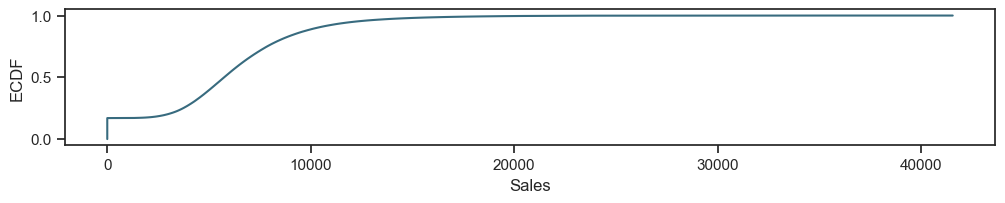

In [159]:
sns.set(style='ticks')
c='#386B7F'
plt.figure(figsize=(12,6))
plt.subplot(311)
cdf=ECDF(train['Sales'])
plt.plot(cdf.x,cdf.y,label='statmodels',color=c);
plt.xlabel('Sales'); plt.ylabel('ECDF');

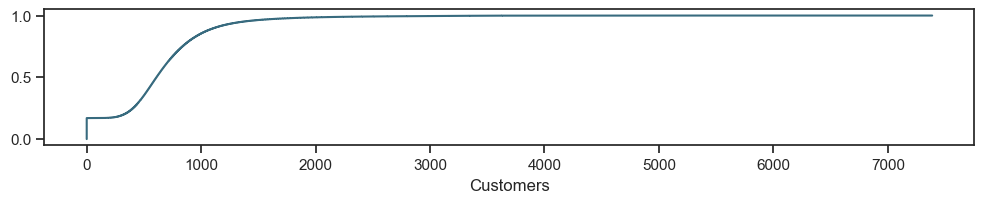

In [161]:
plt.figure(figsize=(12,6))
plt.subplot(312)
cdf = ECDF(train['Customers'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Customers');

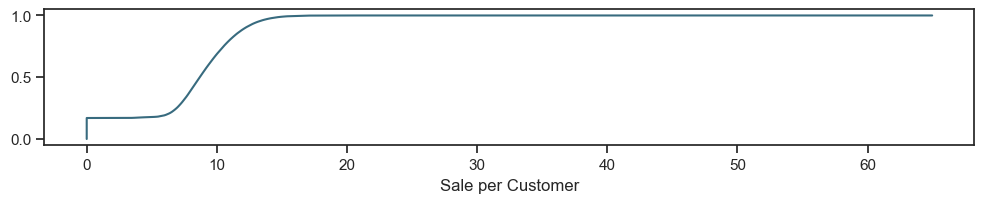

In [162]:
plt.figure(figsize=(12,6))
plt.subplot(313)
cdf = ECDF(train['SalePerCustomer'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c);
plt.xlabel('Sale per Customer');

In [163]:
train[(train.Open == 0) & (train.Sales == 0)]

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31    292          5      0          0     0      1            0   
2015-07-31    876          5      0          0     0      1            0   
2015-07-30    292          4      0          0     0      1            0   
2015-07-30    876          4      0          0     0      1            0   
2015-07-29    292          3      0          0     0      1            0   
...           ...        ...    ...        ...   ...    ...          ...   
2013-01-01   1111          2      0          0     0      0            a   
2013-01-01   1112          2      0          0     0      0            a   
2013-01-01   1113          2      0          0     0      0            a   
2013-01-01   1114          2      0          0     0      0            a   
2013-01-01   1115          2      0          0     0      0            a   

            SchoolHoliday  Year  Month  Day  WeekOfYear  SalePerCustomer  
Date                                                                      
2015-07-31              1  2015      7   31          31              0.0  
2015-07-31              1  2015      7   31          31              0.0  
2015-07-30              1  2015      7   30          31              0.0  
2015-07-30              1  2015      7   30          31              0.0  
2015-07-29              1  2015      7   29          31              0.0  
...                   ...   ...    ...  ...         ...              ...  
2013-01-01              1  2013      1    1           1              0.0  
2013-01-01              1  2013      1    1           1              0.0  
2013-01-01              1  2013      1    1           1              0.0  
2013-01-01              1  2013      1    1           1              0.0  
2013-01-01              1  2013      1    1           1              0.0  

[172817 rows x 13 columns]

In [164]:
zero_sales = train[(train.Open != 0) & (train.Sales == 0)]
print("In total: ", zero_sales.shape)
zero_sales.head(5)

In total:  (54, 13)


Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-05-15    971          5      0          0     1      0            0   
2015-03-26    674          4      0          0     1      0            0   
2015-02-05    699          4      0          0     1      1            0   
2014-10-01    708          3      0          0     1      1            0   
2014-09-22    357          1      0          0     1      0            0   

            SchoolHoliday  Year  Month  Day  WeekOfYear  SalePerCustomer  
Date                                                                      
2015-05-15              1  2015      5   15          20              0.0  
2015-03-26              0  2015      3   26          13              0.0  
2015-02-05              0  2015      2    5           6              0.0  
2014-10-01              0  2014     10    1          40              0.0  
2014-09-22              0  2014      9   22          39              0.0

In [165]:
train = train[(train["Open"] != 0) & (train['Sales'] != 0)]

print("In total: ", train.shape)

In total:  (844338, 13)


In [166]:
train=train.drop(columns=train[(train.Open == 1) & (train.Sales == 0)].index)

In [167]:
{"Mean":np.mean(train.Sales),"Median":np.median(train.Sales)}

{'Mean': 6955.959133664481, 'Median': 6369.0}

In [168]:
train.Customers.describe()

count    844338.000000
mean        762.777166
std         401.194153
min           8.000000
25%         519.000000
50%         676.000000
75%         893.000000
max        7388.000000
Name: Customers, dtype: float64

In [169]:
store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [170]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [171]:
store[pd.isnull(store.CompetitionDistance)]

Store StoreType Assortment  CompetitionDistance  \
290    291         d          a                  NaN   
621    622         a          c                  NaN   
878    879         d          a                  NaN   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
290                        NaN                       NaN       0   
621                        NaN                       NaN       0   
878                        NaN                       NaN       1   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
290              NaN              NaN              NaN  
621              NaN              NaN              NaN  
878              5.0           2013.0  Feb,May,Aug,Nov

In [172]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)

In [173]:
_ = store[pd.isnull(store.Promo2SinceWeek)]
_[_.Promo2 != 0].shape

(0, 10)

In [174]:
store.fillna(0,inplace=True)

In [175]:
print("Joining train set with an additional store information.")
train_store = pd.merge(train, store, how = 'inner', on = 'Store')

print("In total: ", train_store.shape)
train_store.head(1000)

Joining train set with an additional store information.
In total:  (844338, 22)


Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
0        1          5   5263        555     1      1            0   
1        1          4   5020        546     1      1            0   
2        1          3   4782        523     1      1            0   
3        1          2   5011        560     1      1            0   
4        1          1   6102        612     1      1            0   
..     ...        ...    ...        ...   ...    ...          ...   
995      2          5   4655        560     1      1            0   
996      2          4   5009        624     1      1            0   
997      2          3   6818        776     1      1            0   
998      2          2   5651        601     1      1            0   
999      2          1   6423        690     1      1            0   

     SchoolHoliday  Year  Month  ...  SalePerCustomer  StoreType  Assortment  \
0                1  2015      7  ...         9.482883          c           a   
1                1  2015      7  ...         9.194139          c           a   
2                1  2015      7  ...         9.143403          c           a   
3                1  2015      7  ...         8.948214          c           a   
4                1  2015      7  ...         9.970588          c           a   
..             ...   ...    ...  ...              ...        ...         ...   
995              0  2014     11  ...         8.312500          a           a   
996              0  2014     11  ...         8.027244          a           a   
997              0  2014     11  ...         8.786082          a           a   
998              0  2014     11  ...         9.402662          a           a   
999              0  2014     11  ...         9.308696          a           a   

    CompetitionDistance CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0                1270.0                       9.0                    2008.0   
1                1270.0                       9.0                    2008.0   
2                1270.0                       9.0                    2008.0   
3                1270.0                       9.0                    2008.0   
4                1270.0                       9.0                    2008.0   
..                  ...                       ...                       ...   
995               570.0                      11.0                    2007.0   
996               570.0                      11.0                    2007.0   
997               570.0                      11.0                    2007.0   
998               570.0                      11.0                    2007.0   
999               570.0                      11.0                    2007.0   

     Promo2  Promo2SinceWeek  Promo2SinceYear    PromoInterval  
0         0              0.0              0.0                0  
1         0              0.0              0.0                0  
2         0              0.0              0.0                0  
3         0              0.0              0.0                0  
4         0              0.0              0.0                0  
..      ...              ...              ...              ...  
995       1             13.0           2010.0  Jan,Apr,Jul,Oct  
996       1             13.0           2010.0  Jan,Apr,Jul,Oct  
997       1             13.0           2010.0  Jan,Apr,Jul,Oct  
998       1             13.0           2010.0  Jan,Apr,Jul,Oct  
999       1             13.0           2010.0  Jan,Apr,Jul,Oct  

[1000 rows x 22 columns]

In [176]:
train_store.head(100)

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
0       1          5   5263        555     1      1            0   
1       1          4   5020        546     1      1            0   
2       1          3   4782        523     1      1            0   
3       1          2   5011        560     1      1            0   
4       1          1   6102        612     1      1            0   
..    ...        ...    ...        ...   ...    ...          ...   
95      1          2   4163        555     1      0            0   
96      1          6   6709        796     1      0            0   
97      1          4   6574        722     1      1            0   
98      1          3   6816        707     1      1            0   
99      1          2   6206        589     1      1            0   

    SchoolHoliday  Year  Month  ...  SalePerCustomer  StoreType  Assortment  \
0               1  2015      7  ...         9.482883          c           a   
1               1  2015      7  ...         9.194139          c           a   
2               1  2015      7  ...         9.143403          c           a   
3               1  2015      7  ...         8.948214          c           a   
4               1  2015      7  ...         9.970588          c           a   
..            ...   ...    ...  ...              ...        ...         ...   
95              1  2015      4  ...         7.500901          c           a   
96              1  2015      4  ...         8.428392          c           a   
97              1  2015      4  ...         9.105263          c           a   
98              1  2015      4  ...         9.640736          c           a   
99              1  2015      3  ...        10.536503          c           a   

   CompetitionDistance CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0               1270.0                       9.0                    2008.0   
1               1270.0                       9.0                    2008.0   
2               1270.0                       9.0                    2008.0   
3               1270.0                       9.0                    2008.0   
4               1270.0                       9.0                    2008.0   
..                 ...                       ...                       ...   
95              1270.0                       9.0                    2008.0   
96              1270.0                       9.0                    2008.0   
97              1270.0                       9.0                    2008.0   
98              1270.0                       9.0                    2008.0   
99              1270.0                       9.0                    2008.0   

    Promo2  Promo2SinceWeek  Promo2SinceYear  PromoInterval  
0        0              0.0              0.0              0  
1        0              0.0              0.0              0  
2        0              0.0              0.0              0  
3        0              0.0              0.0              0  
4        0              0.0              0.0              0  
..     ...              ...              ...            ...  
95       0              0.0              0.0              0  
96       0              0.0              0.0              0  
97       0              0.0              0.0              0  
98       0              0.0              0.0              0  
99       0              0.0              0.0              0  

[100 rows x 22 columns]

In [177]:
train_store.groupby('StoreType')['Sales'].describe()

count          mean          std     min      25%     50%  \
StoreType                                                                 
a          457042.0   6925.697986  3277.351589    46.0  4695.25  6285.0   
b           15560.0  10233.380141  5155.729868  1252.0  6345.75  9130.0   
c          112968.0   6933.126425  2896.958579   133.0  4916.00  6408.0   
d          258768.0   6822.300064  2556.401455   538.0  5050.00  6395.0   

                75%      max  
StoreType                     
a           8406.00  41551.0  
b          13184.25  38722.0  
c           8349.25  31448.0  
d           8123.25  38037.0

In [178]:
train_store.groupby('StoreType')['Customers', 'Sales'].sum()

C:\Users\mahen\AppData\Local\Temp\ipykernel_37720\3647216997.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train_store.groupby('StoreType')['Customers', 'Sales'].sum()


Customers       Sales
StoreType                       
a          363541431  3165334859
b           31465616   159231395
c           92129705   783221426
d          156904995  1765392943

c:\Users\mahen\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


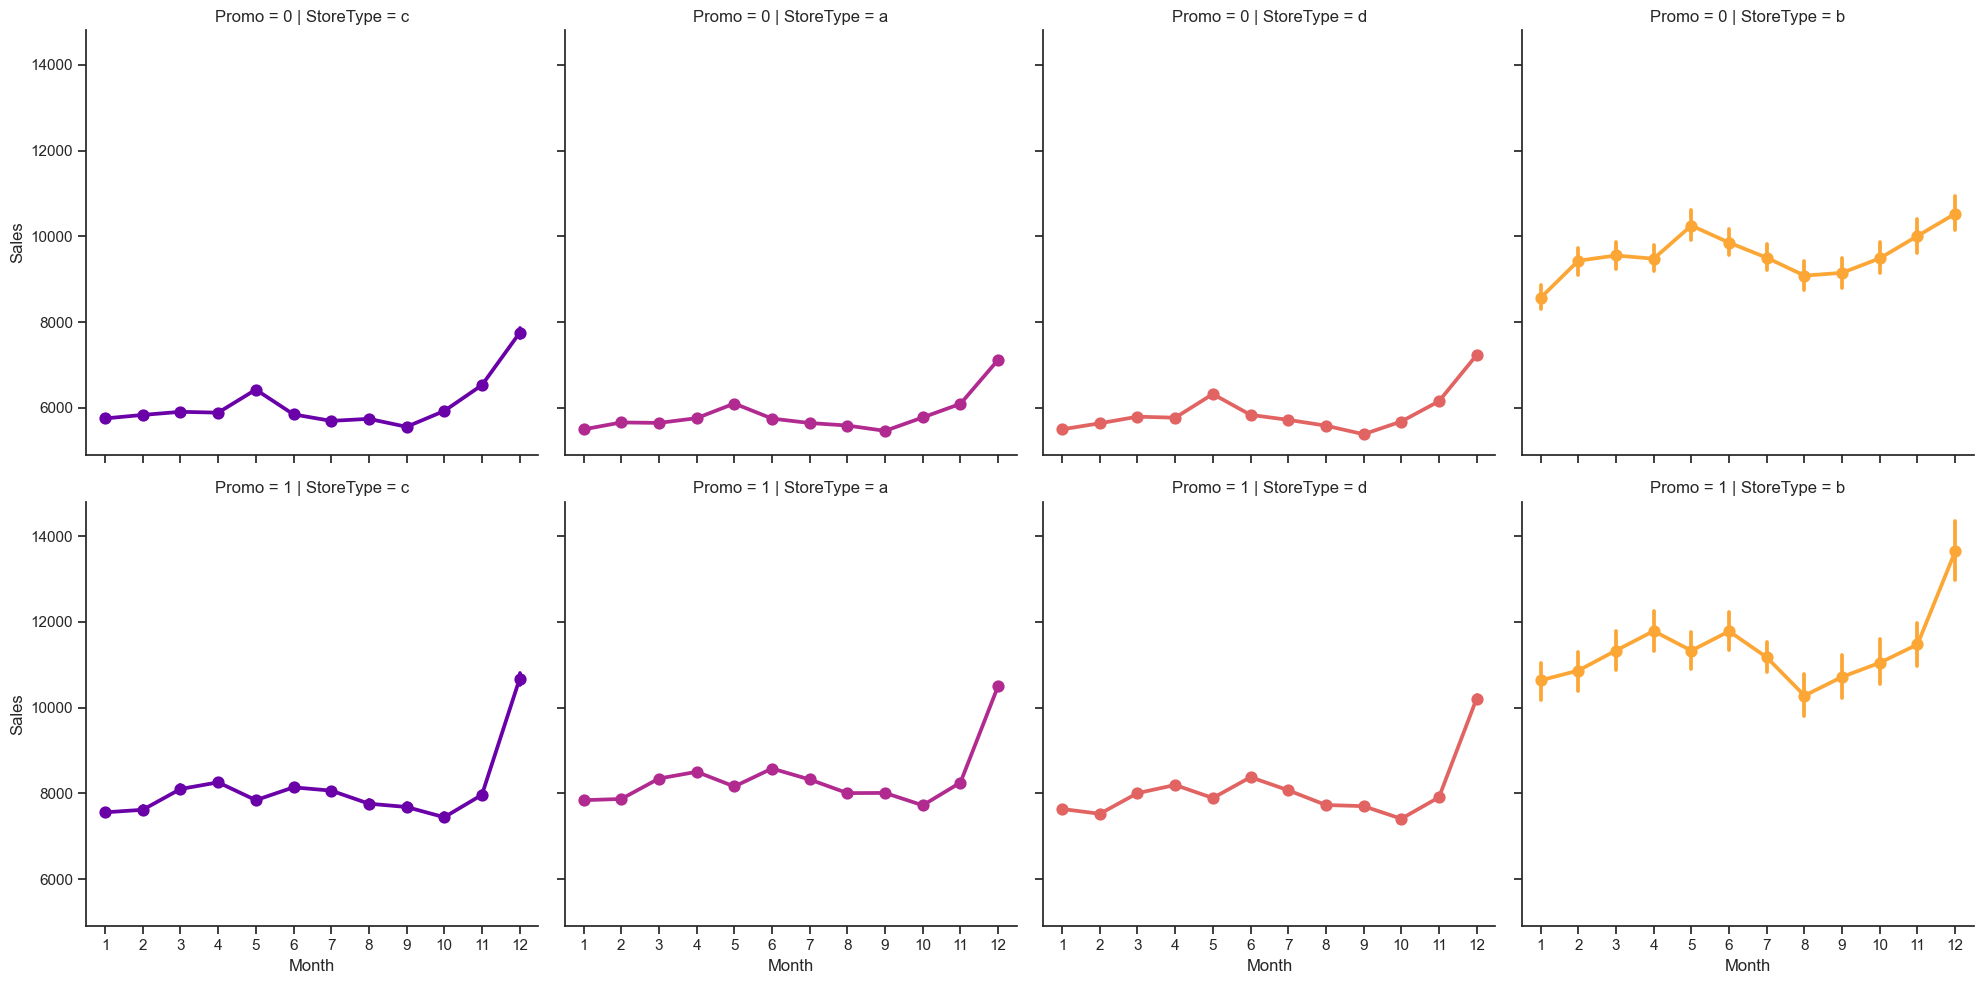

In [179]:
sns.factorplot(data = train_store, x = 'Month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c)

c:\Users\mahen\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


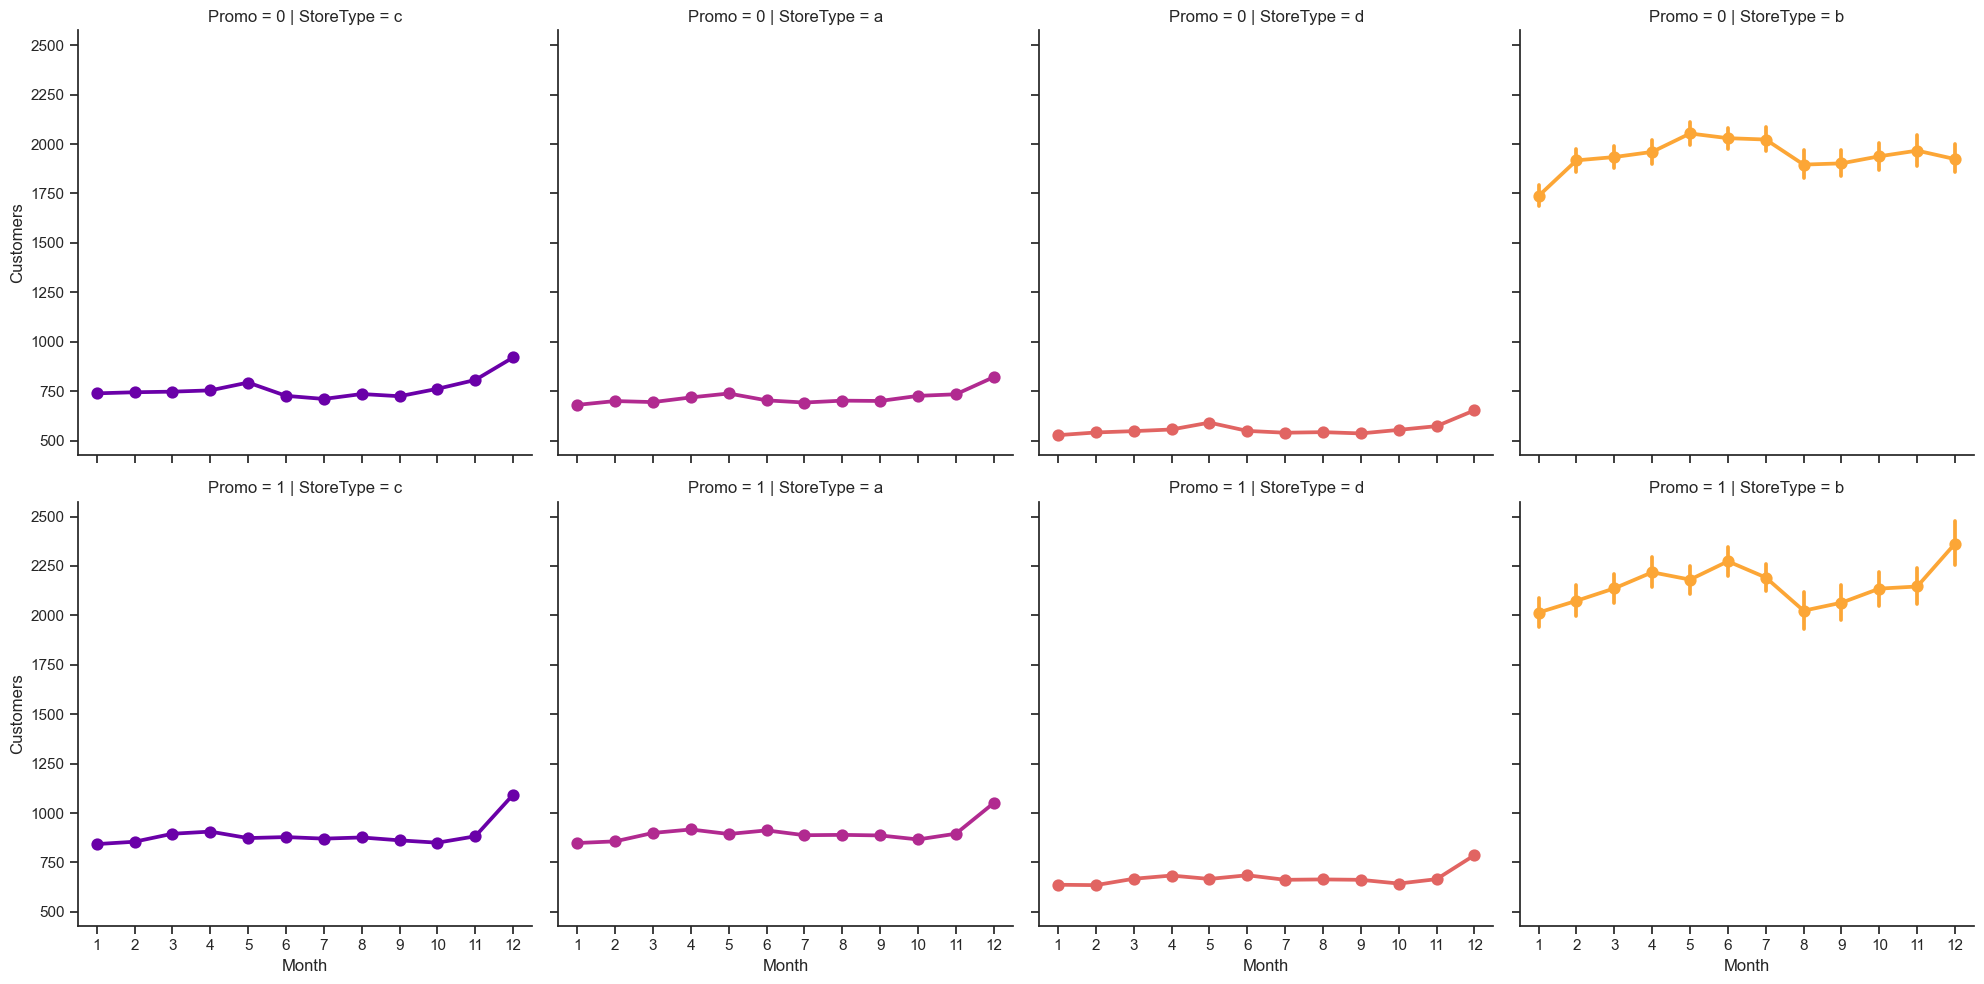

In [180]:
sns.factorplot(data = train_store, x = 'Month', y = "Customers", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', 
               color = c)

c:\Users\mahen\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


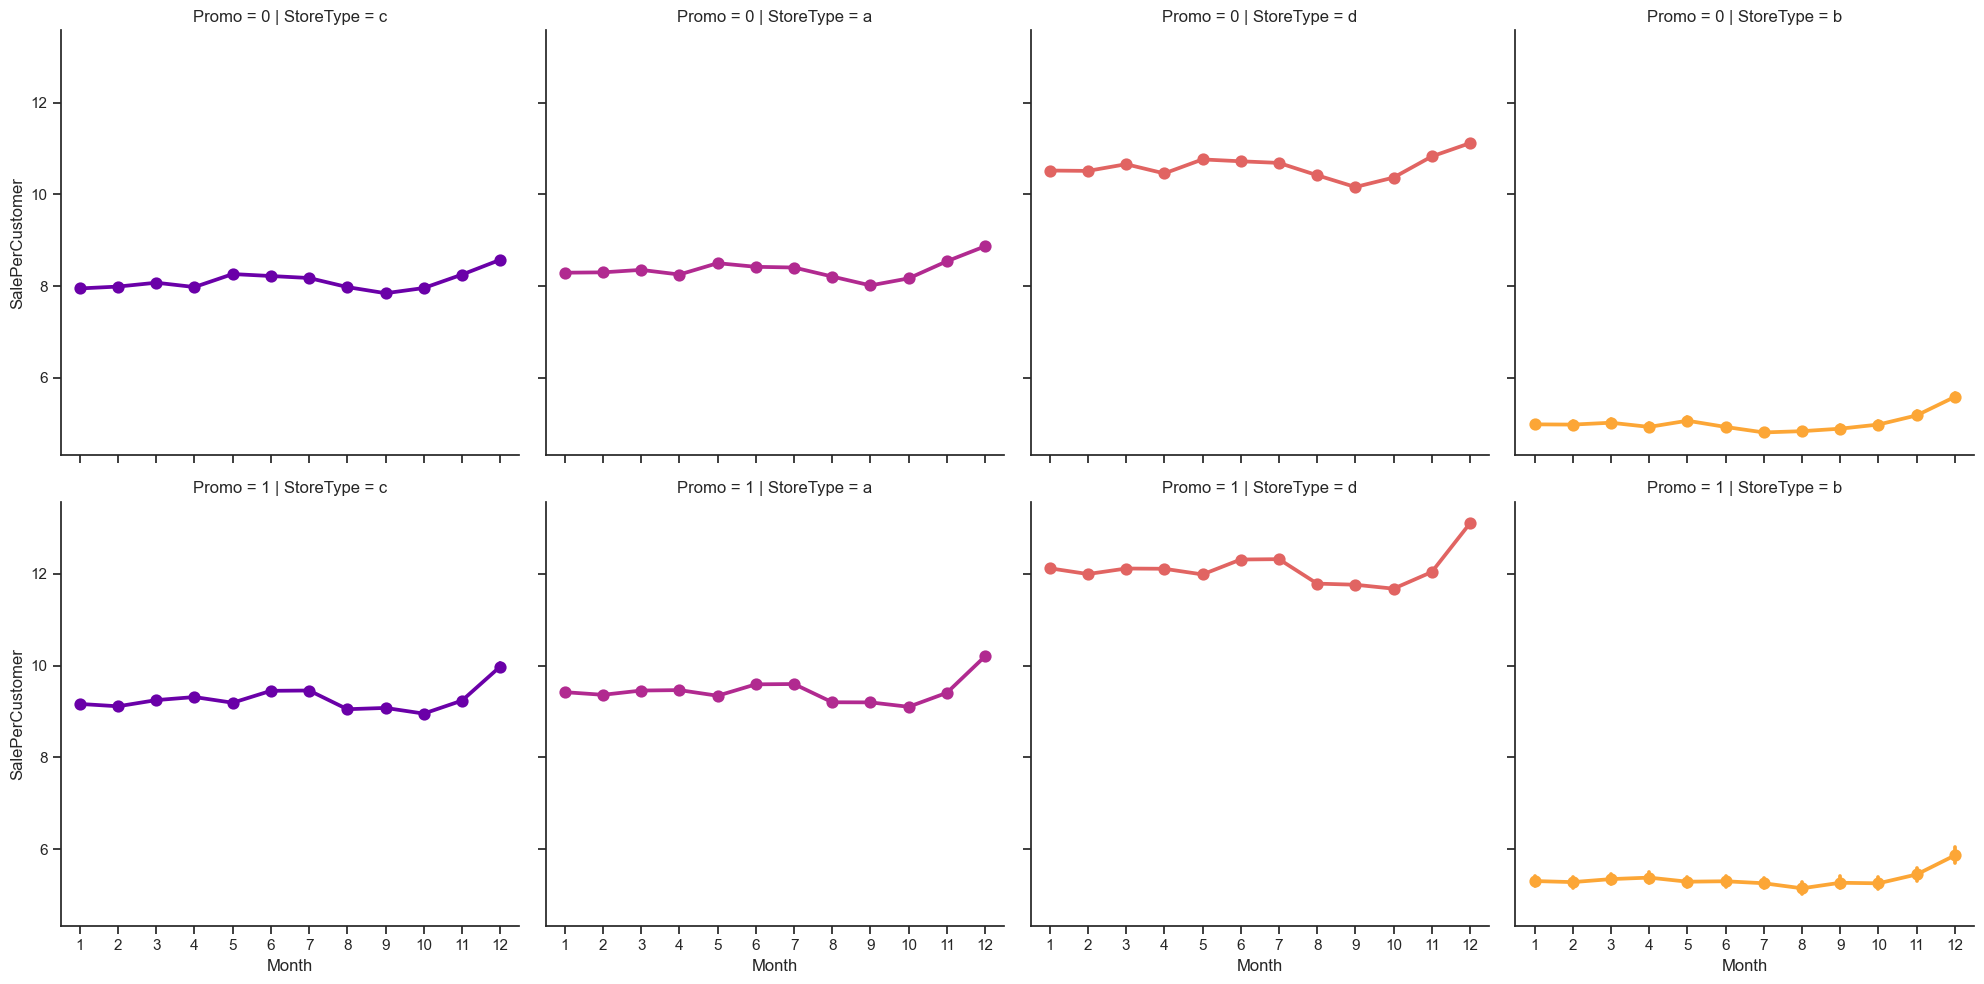

In [181]:
sns.factorplot(data = train_store, x = 'Month', y = "SalePerCustomer", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = c)

c:\Users\mahen\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


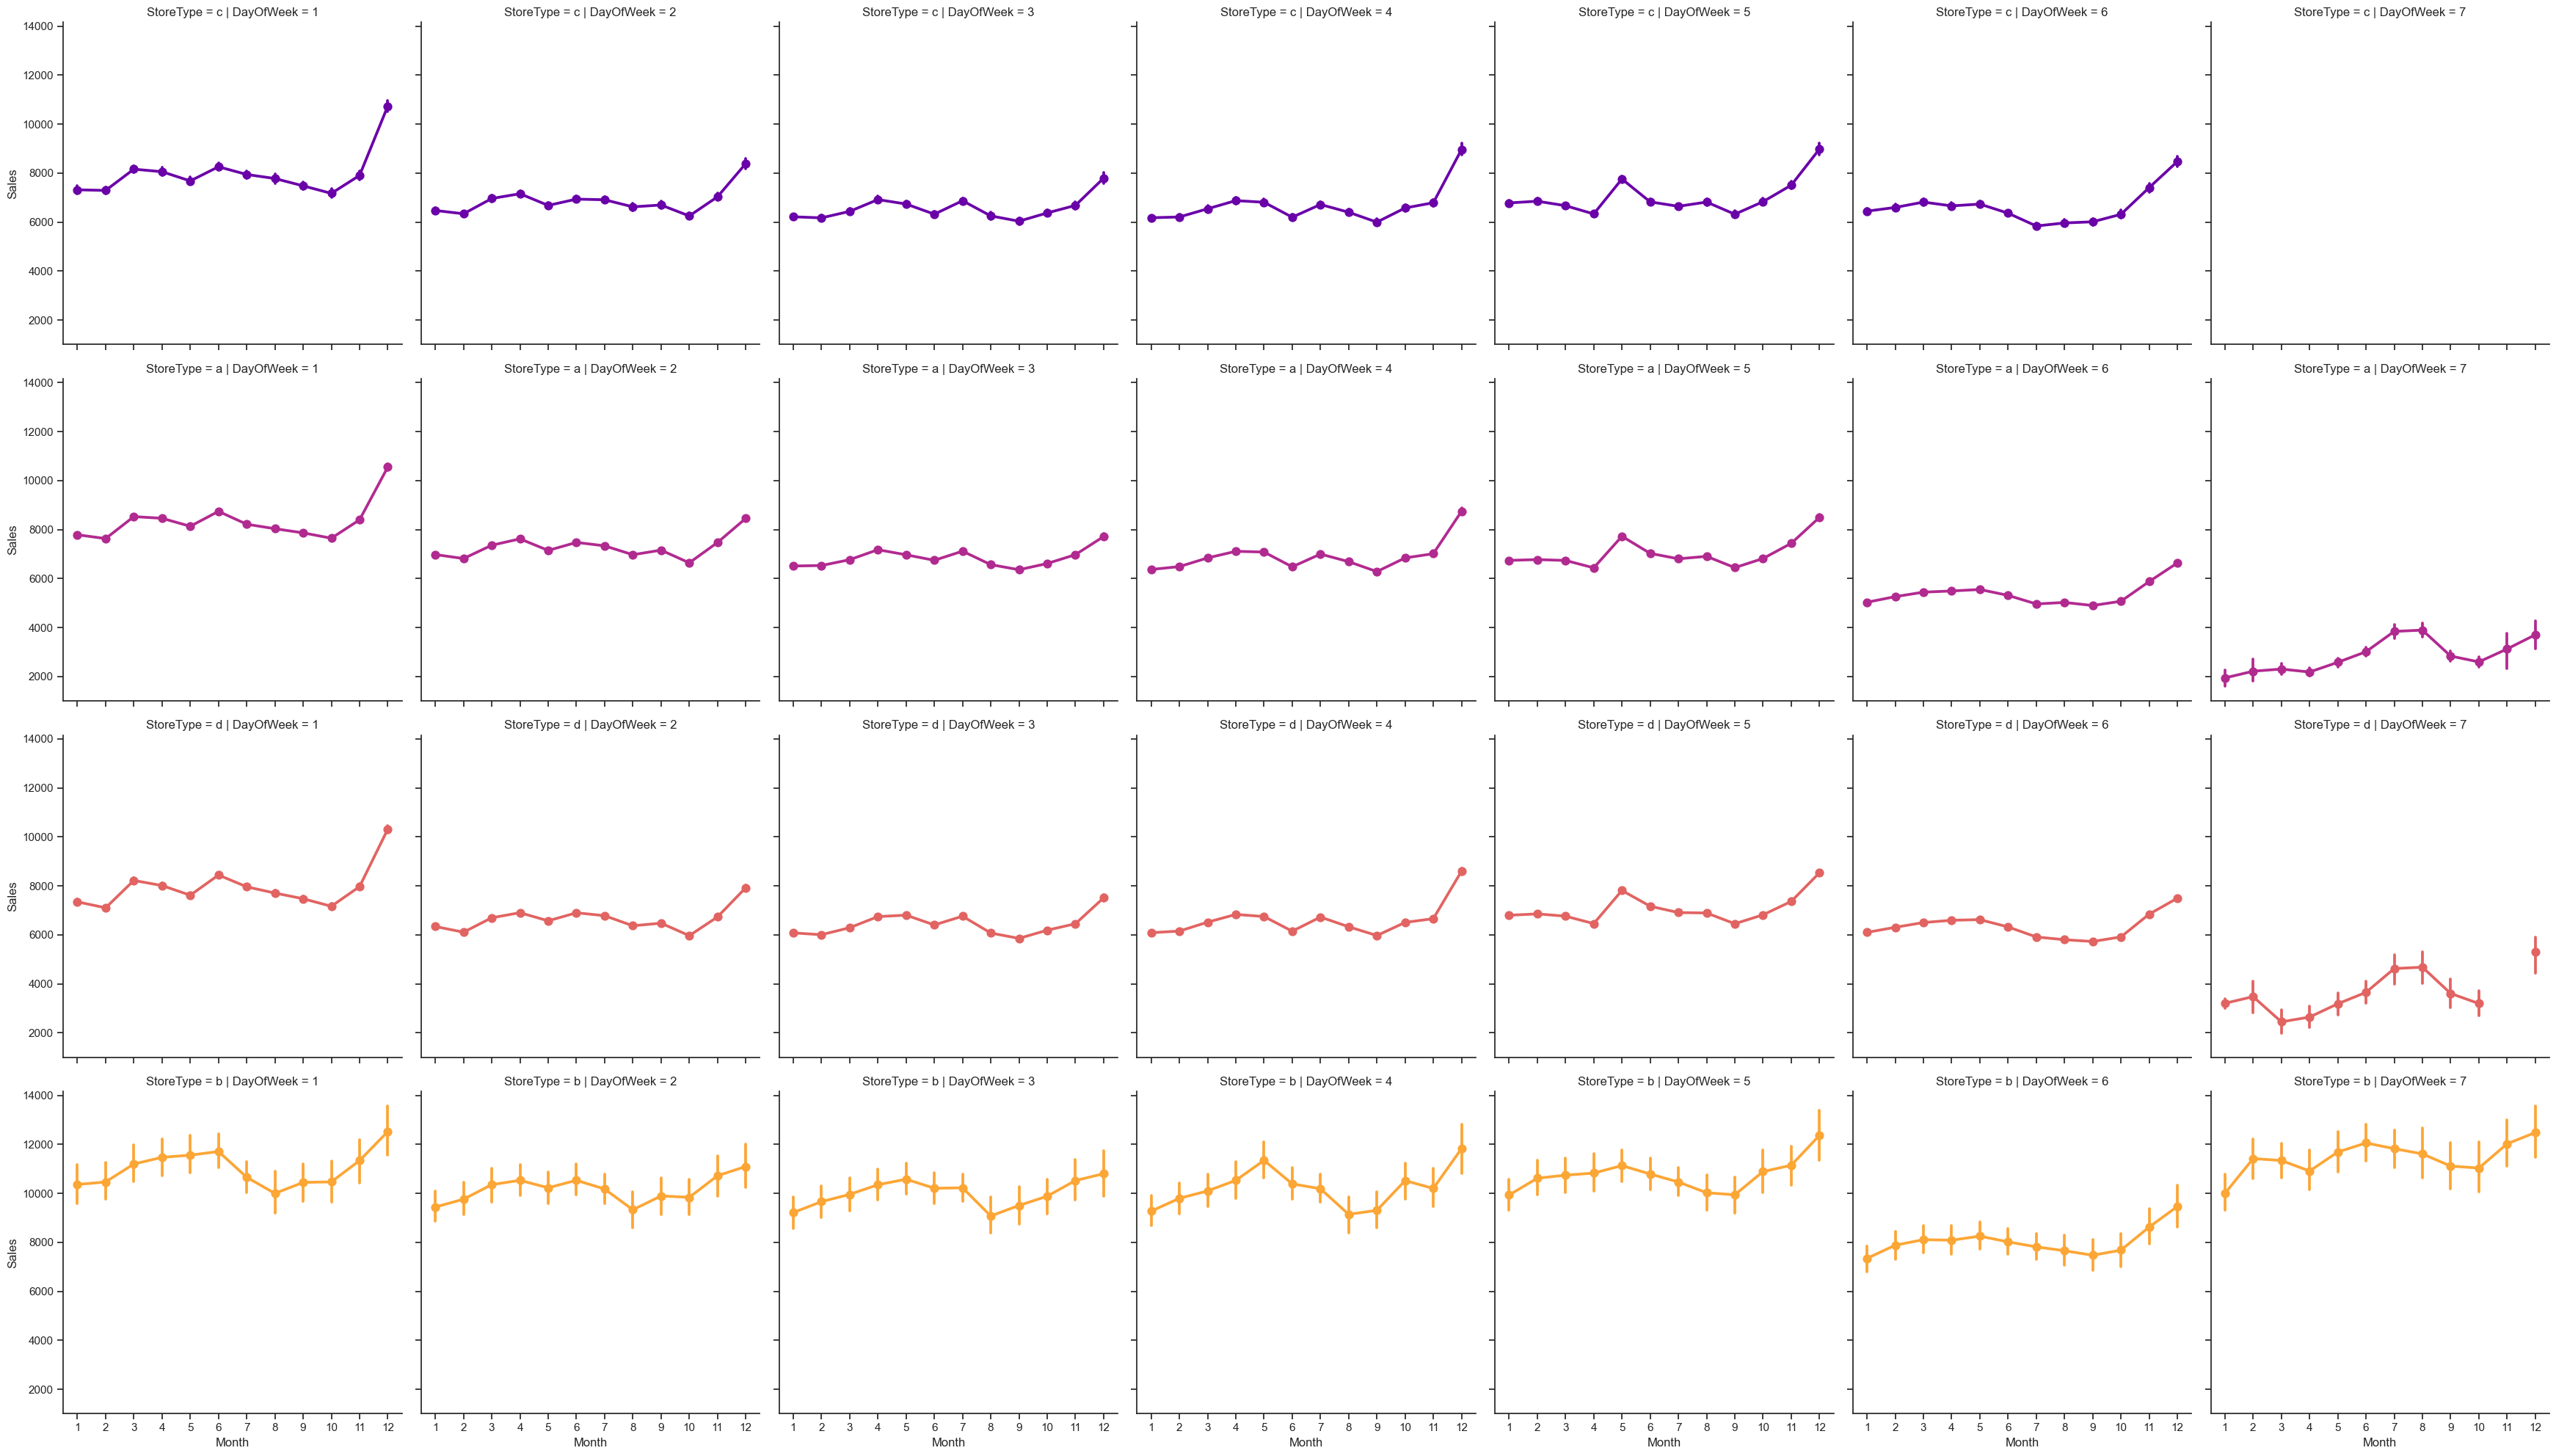

In [182]:
sns.factorplot(data = train_store, x = 'Month', y = "Sales", 
               col = 'DayOfWeek', # per store type in cols
               palette = 'plasma', 
               hue = 'StoreType',
               row = 'StoreType', # per store type in rows
               color = c)

In [183]:
train_store[(train_store.Open == 1) & (train_store.DayOfWeek == 7)]['Store'].unique()

array([  85,  122,  209,  259,  262,  274,  299,  310,  335,  353,  423,
        433,  453,  494,  512,  524,  530,  562,  578,  676,  682,  732,
        733,  769,  863,  867,  877,  931,  948, 1045, 1081, 1097, 1099],
      dtype=int64)

In [184]:
train_store['CompetitionOpen'] = 12 * (train_store.Year - train_store.CompetitionOpenSinceYear) + \
        (train_store.Month - train_store.CompetitionOpenSinceMonth)
    
# Promo open time
train_store['PromoOpen'] = 12 * (train_store.Year - train_store.Promo2SinceYear) + \
        (train_store.WeekOfYear - train_store.Promo2SinceWeek) / 4.0

# replace NA's by 0
train_store.fillna(0, inplace = True)

# average PromoOpen time and CompetitionOpen time per store type
train_store.loc[:, ['StoreType', 'Sales', 'Customers', 'PromoOpen', 'CompetitionOpen']].groupby('StoreType').mean()

Sales    Customers     PromoOpen  CompetitionOpen
StoreType                                                          
a           6925.697986   795.422370  12918.492198      7115.514452
b          10233.380141  2022.211825  17199.328069     11364.495244
c           6933.126425   815.538073  12158.636107      6745.418694
d           6822.300064   606.353935  10421.916846      9028.526526

C:\Users\mahen\AppData\Local\Temp\ipykernel_37720\934770029.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_all, dtype = np.bool)


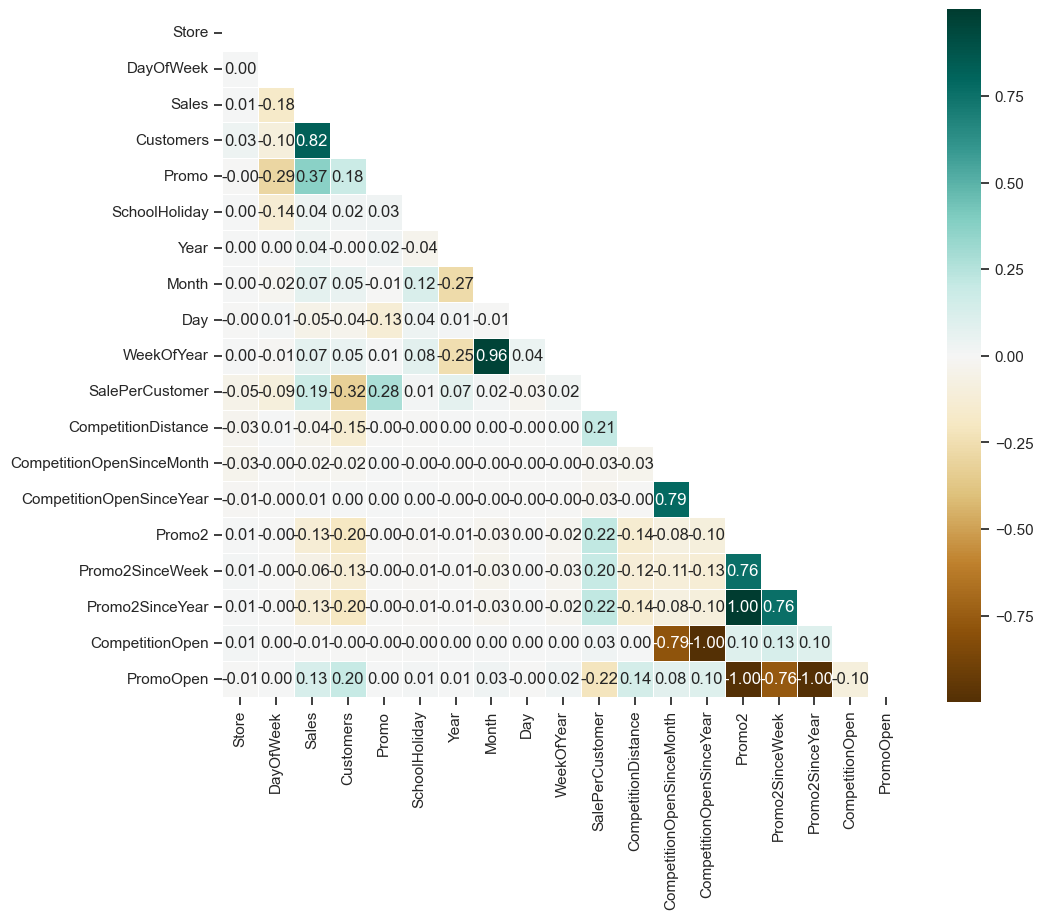

In [185]:
corr_all = train_store.drop('Open', axis = 1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask, annot = True, square = True, linewidths = 0.5, ax = ax, cmap = "BrBG", fmt='.2f')      
plt.show()

c:\Users\mahen\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


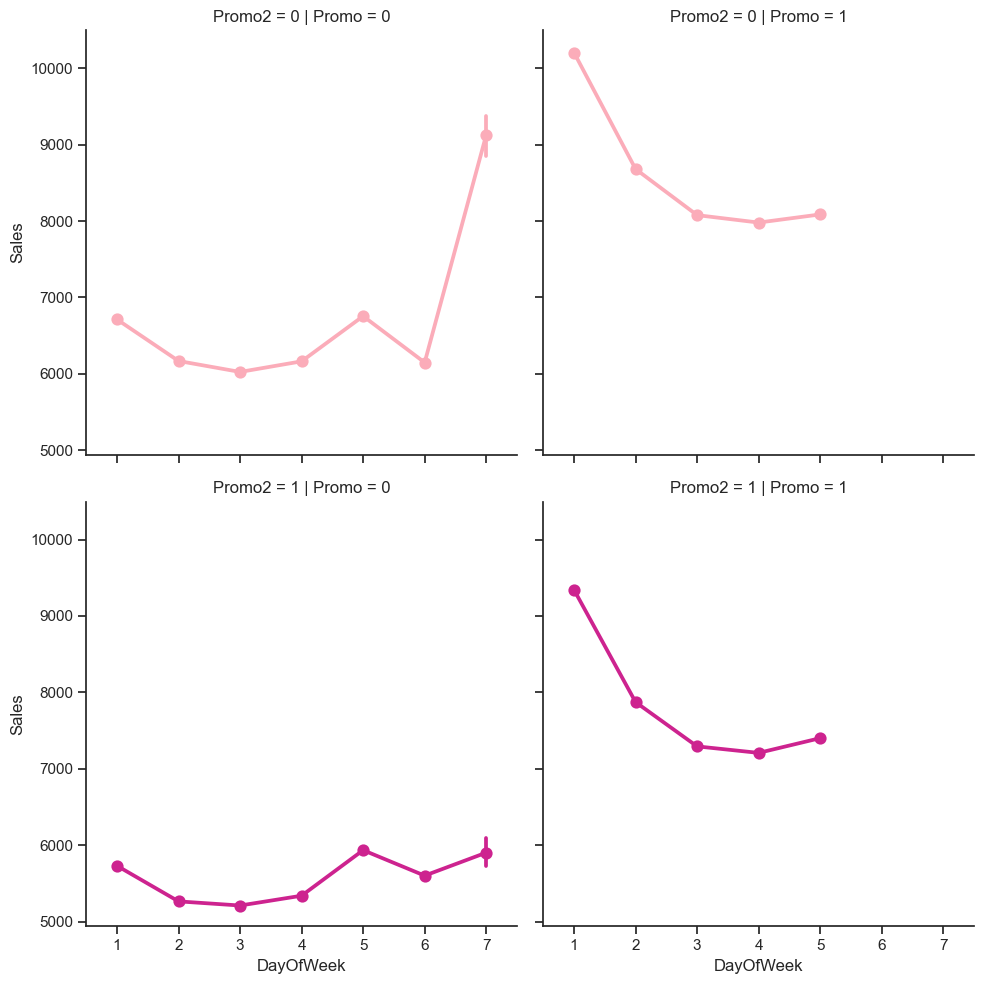

In [186]:
sns.factorplot(data = train_store, x = 'DayOfWeek', y = "Sales", 
               col = 'Promo', 
               row = 'Promo2',
               hue = 'Promo2',
               palette = 'RdPu')

In [187]:
train_store.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
0      1          5   5263        555     1      1            0   
1      1          4   5020        546     1      1            0   
2      1          3   4782        523     1      1            0   
3      1          2   5011        560     1      1            0   
4      1          1   6102        612     1      1            0   

   SchoolHoliday  Year  Month  ...  Assortment  CompetitionDistance  \
0              1  2015      7  ...           a               1270.0   
1              1  2015      7  ...           a               1270.0   
2              1  2015      7  ...           a               1270.0   
3              1  2015      7  ...           a               1270.0   
4              1  2015      7  ...           a               1270.0   

   CompetitionOpenSinceMonth CompetitionOpenSinceYear Promo2  Promo2SinceWeek  \
0                        9.0                   2008.0      0              0.0   
1                        9.0                   2008.0      0              0.0   
2                        9.0                   2008.0      0              0.0   
3                        9.0                   2008.0      0              0.0   
4                        9.0                   2008.0      0              0.0   

   Promo2SinceYear  PromoInterval  CompetitionOpen  PromoOpen  
0              0.0              0             82.0   24187.75  
1              0.0              0             82.0   24187.75  
2              0.0              0             82.0   24187.75  
3              0.0              0             82.0   24187.75  
4              0.0              0             82.0   24187.75  

[5 rows x 24 columns]

<AxesSubplot:xlabel='Date'>

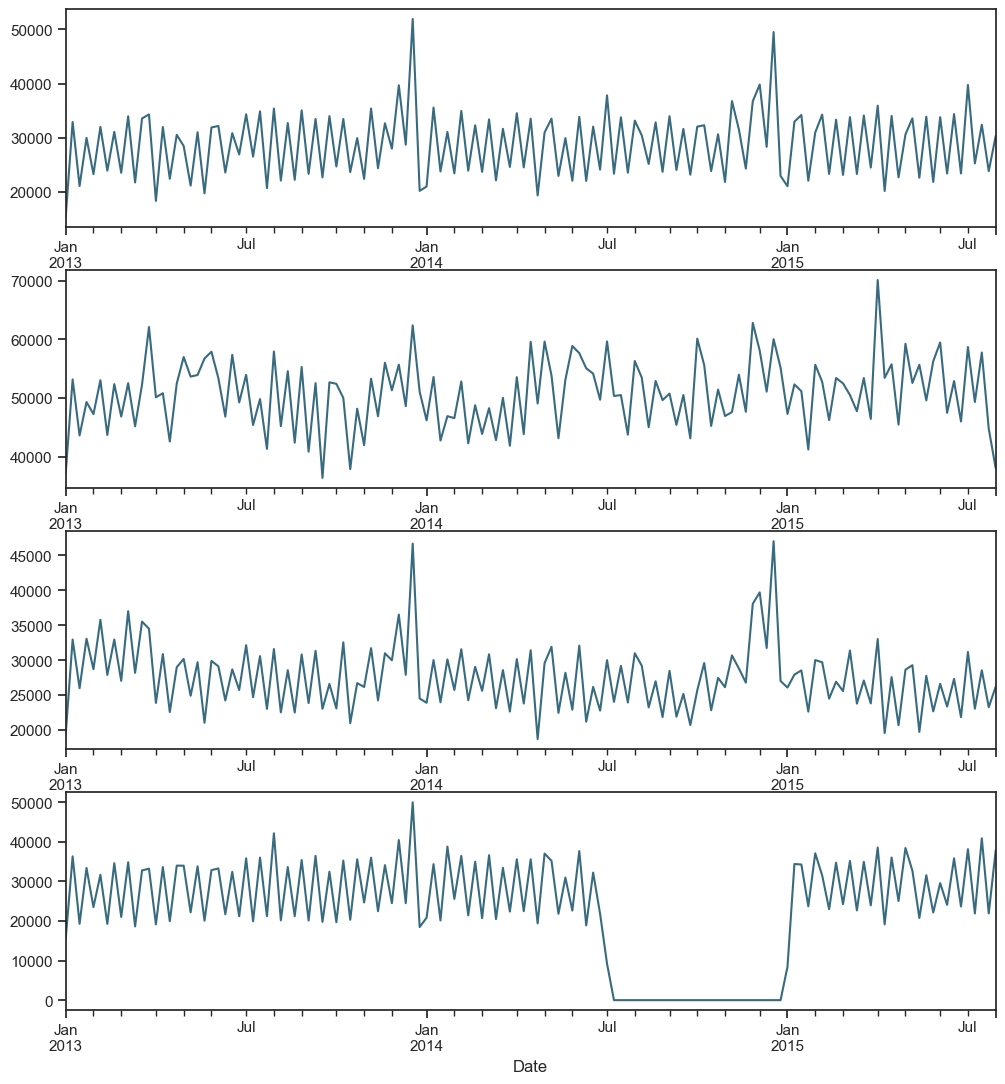

In [188]:
# preparation: input should be float type
train['Sales'] = train['Sales'] * 1.0

# store types
sales_a = train[train.Store == 2]['Sales']
sales_b = train[train.Store == 85]['Sales']
sales_c = train[train.Store == 1]['Sales']
sales_d = train[train.Store == 13]['Sales']

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize = (12, 13))

# store types
sales_a.resample('W').sum().plot(color = c, ax = ax1)
sales_b.resample('W').sum().plot(color = c, ax = ax2)
sales_c.resample('W').sum().plot(color = c, ax = ax3)
sales_d.resample('W').sum().plot(color = c, ax = ax4)

In [194]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

In [195]:
from scipy import stats
from scipy.stats import normaltest
def residual_plot(model):

    resid = model.resid
    print(normaltest(resid))
    # returns a 2-tuple of the chi-squared statistic, and the associated p-value. the p-value is very small, meaning
    # the residual is not a normal distribution

    fig = plt.figure(figsize=(12,8))
    ax0 = fig.add_subplot(111)

    sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

    # Get the fitted parameters used by the function
    (mu, sigma) = stats.norm.fit(resid)

    #Now plot the distribution using 
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
    plt.ylabel('Frequency')
    plt.title('Residual distribution')


    # ACF and PACF
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(model.resid, lags=40, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(model.resid, lags=40, ax=ax2)

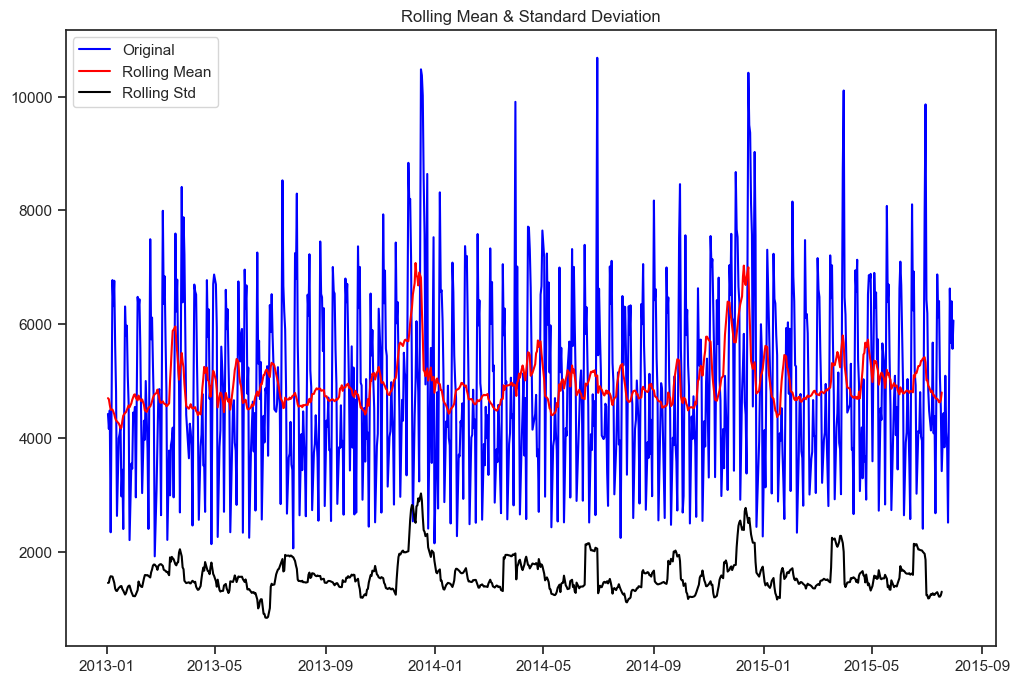

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -5.292708
p-value                          0.000006
#Lags Used                      17.000000
Number of Observations Used    766.000000
Critical Value (1%)             -3.438916
Critical Value (5%)             -2.865321
Critical Value (10%)            -2.568783
dtype: float64


In [196]:
test_stationarity(sales_a)

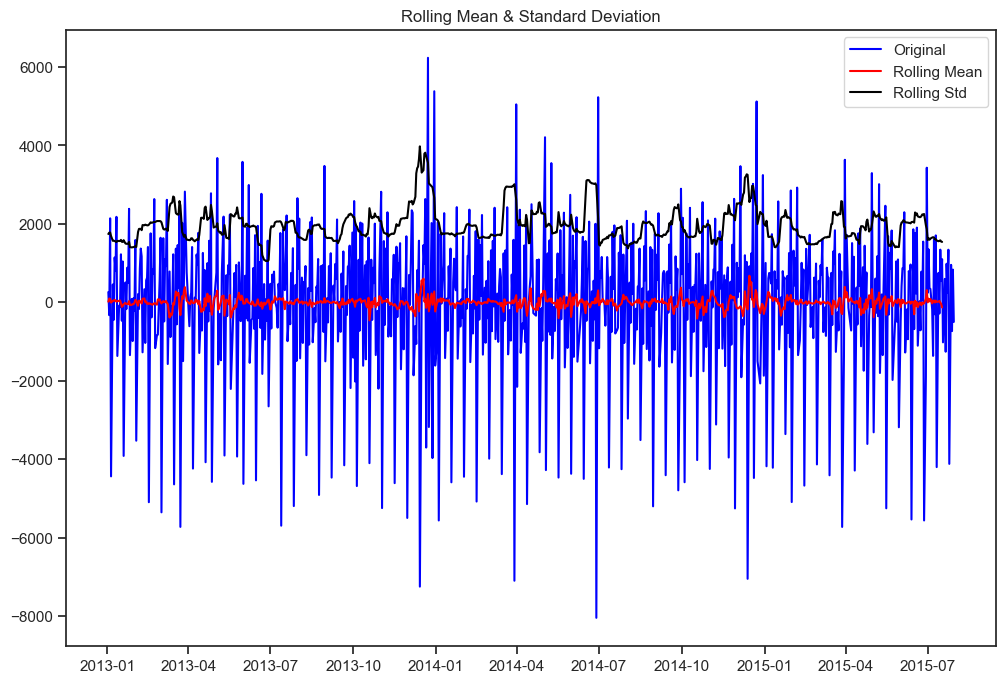

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.219964e+01
p-value                        1.231658e-22
#Lags Used                     1.600000e+01
Number of Observations Used    7.660000e+02
Critical Value (1%)           -3.438916e+00
Critical Value (5%)           -2.865321e+00
Critical Value (10%)          -2.568783e+00
dtype: float64


In [197]:
first_diff_a = sales_a - sales_a.shift(1)
first_diff_a = first_diff_a.dropna(inplace = False)
test_stationarity(first_diff_a, window = 12)

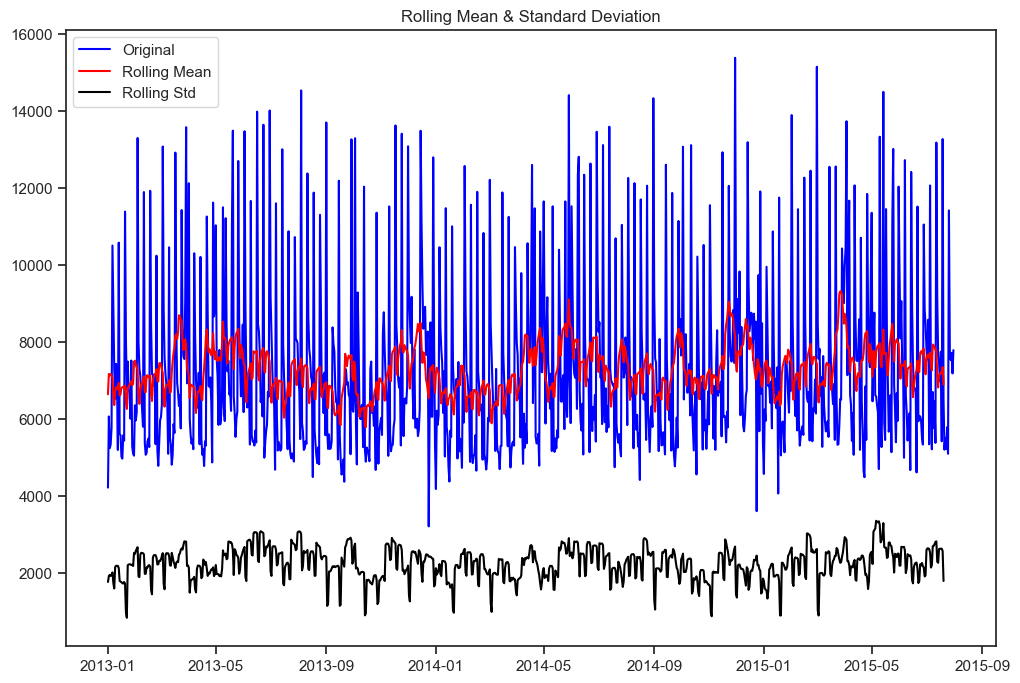

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -4.934210
p-value                          0.000030
#Lags Used                      20.000000
Number of Observations Used    921.000000
Critical Value (1%)             -3.437470
Critical Value (5%)             -2.864683
Critical Value (10%)            -2.568444
dtype: float64


In [198]:
test_stationarity(sales_b)

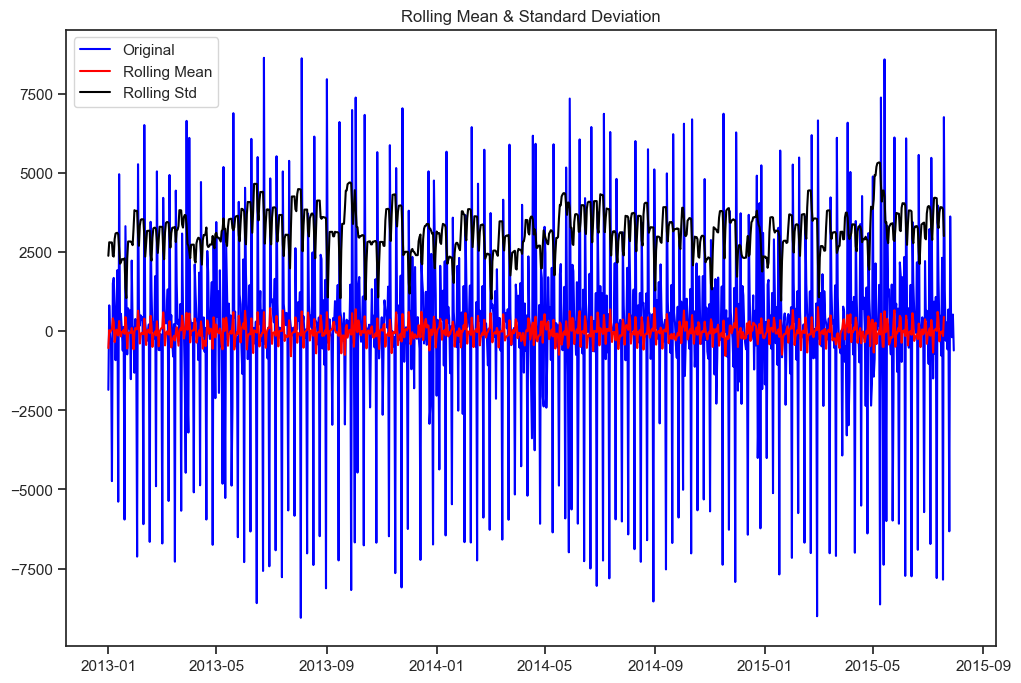

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.102941e+01
p-value                        5.718144e-20
#Lags Used                     2.000000e+01
Number of Observations Used    9.200000e+02
Critical Value (1%)           -3.437478e+00
Critical Value (5%)           -2.864687e+00
Critical Value (10%)          -2.568445e+00
dtype: float64


In [199]:
first_diff_b = sales_b - sales_b.shift(1)
first_diff_b = first_diff_b.dropna(inplace = False)
test_stationarity(first_diff_b, window = 12)

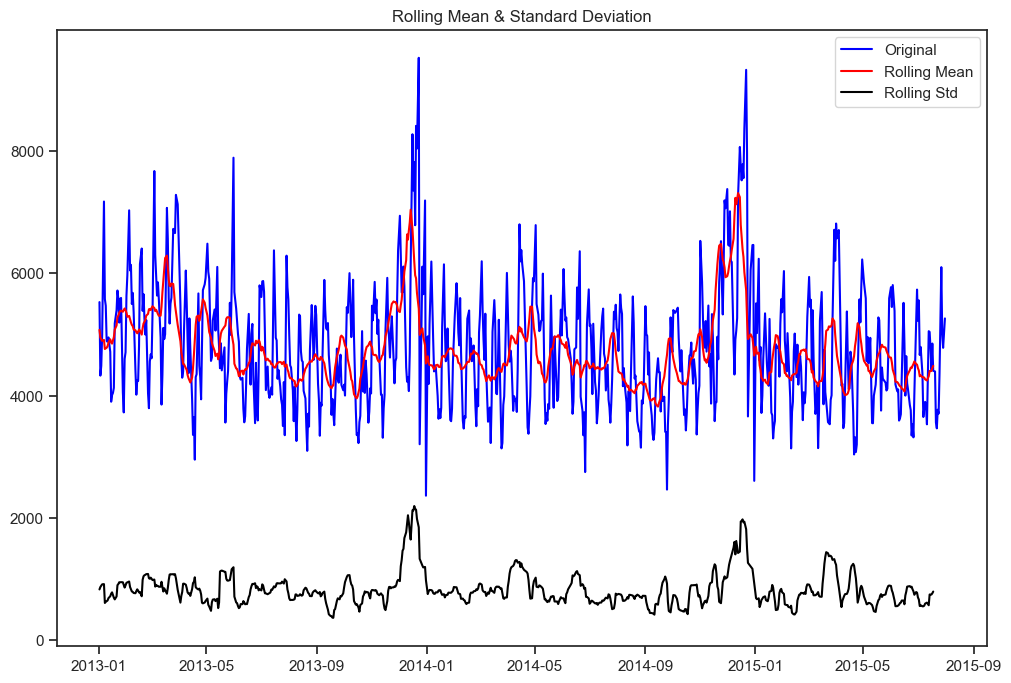

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -5.412786
p-value                          0.000003
#Lags Used                      13.000000
Number of Observations Used    767.000000
Critical Value (1%)             -3.438905
Critical Value (5%)             -2.865316
Critical Value (10%)            -2.568781
dtype: float64


In [200]:
test_stationarity(sales_c)

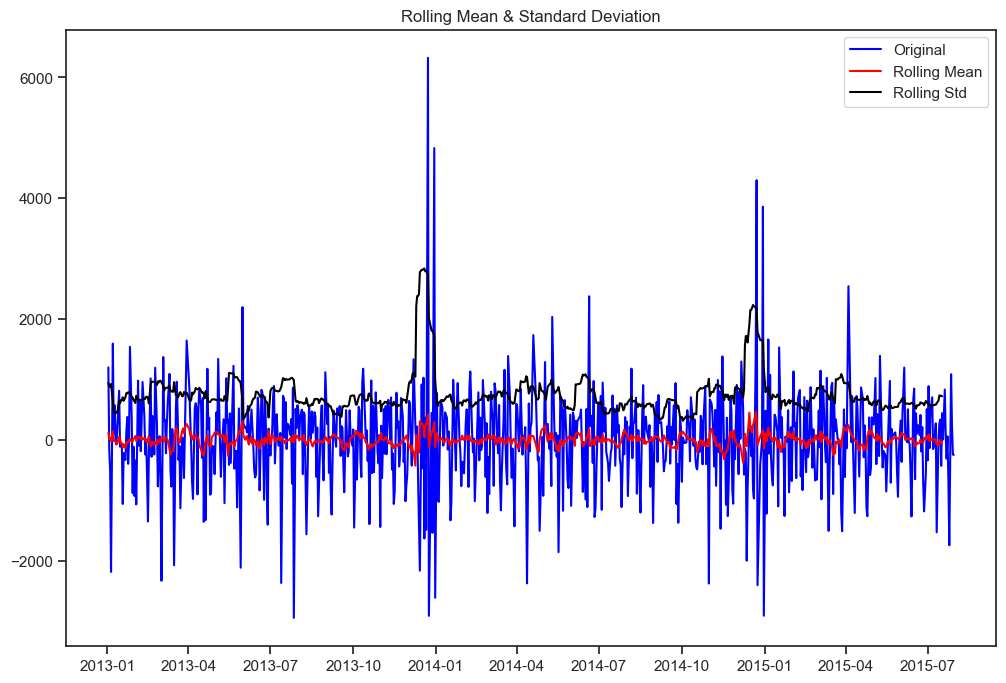

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.042084e+01
p-value                        1.706353e-18
#Lags Used                     2.000000e+01
Number of Observations Used    7.590000e+02
Critical Value (1%)           -3.438995e+00
Critical Value (5%)           -2.865355e+00
Critical Value (10%)          -2.568802e+00
dtype: float64


In [201]:
first_diff_c = sales_c - sales_c.shift(1)
first_diff_c = first_diff_c.dropna(inplace = False)
test_stationarity(first_diff_c, window = 12)

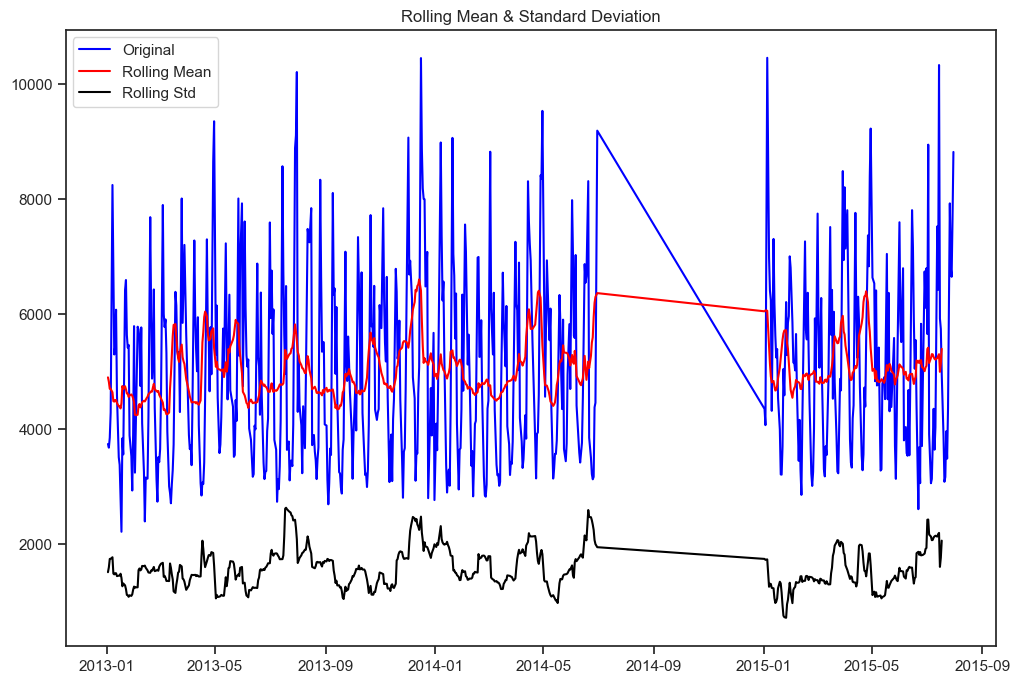

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -6.321001e+00
p-value                        3.066380e-08
#Lags Used                     1.200000e+01
Number of Observations Used    6.080000e+02
Critical Value (1%)           -3.441151e+00
Critical Value (5%)           -2.866305e+00
Critical Value (10%)          -2.569308e+00
dtype: float64


In [202]:
test_stationarity(sales_d)

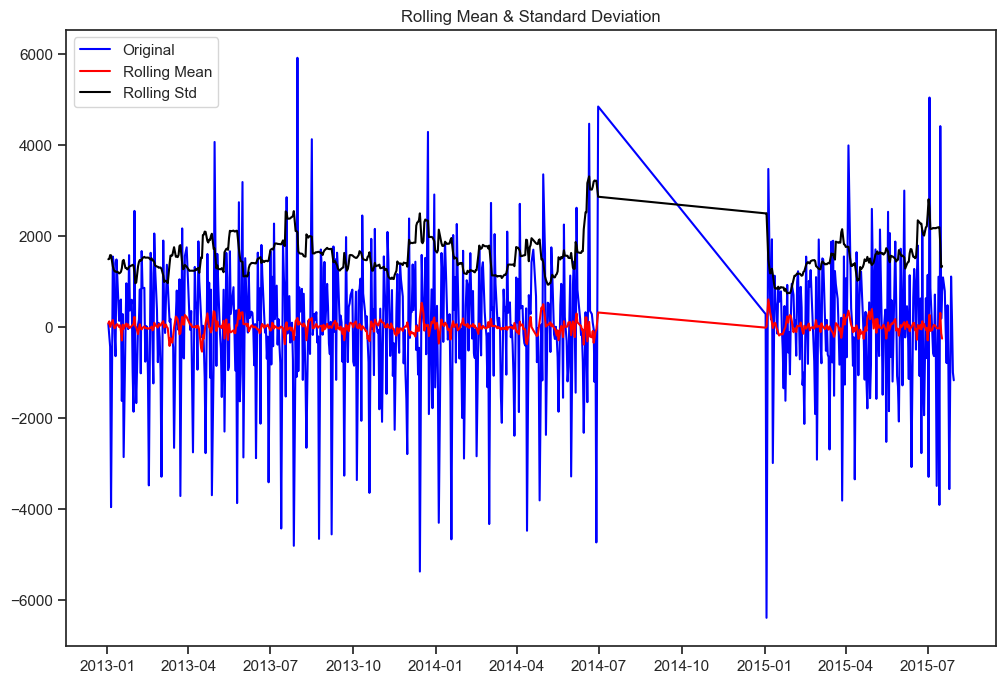

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -9.553455e+00
p-value                        2.535472e-16
#Lags Used                     1.900000e+01
Number of Observations Used    6.000000e+02
Critical Value (1%)           -3.441296e+00
Critical Value (5%)           -2.866369e+00
Critical Value (10%)          -2.569342e+00
dtype: float64


In [203]:
first_diff_d = sales_d - sales_d.shift(1)
first_diff_d = first_diff_d.dropna(inplace = False)
test_stationarity(first_diff_d, window = 12)

c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


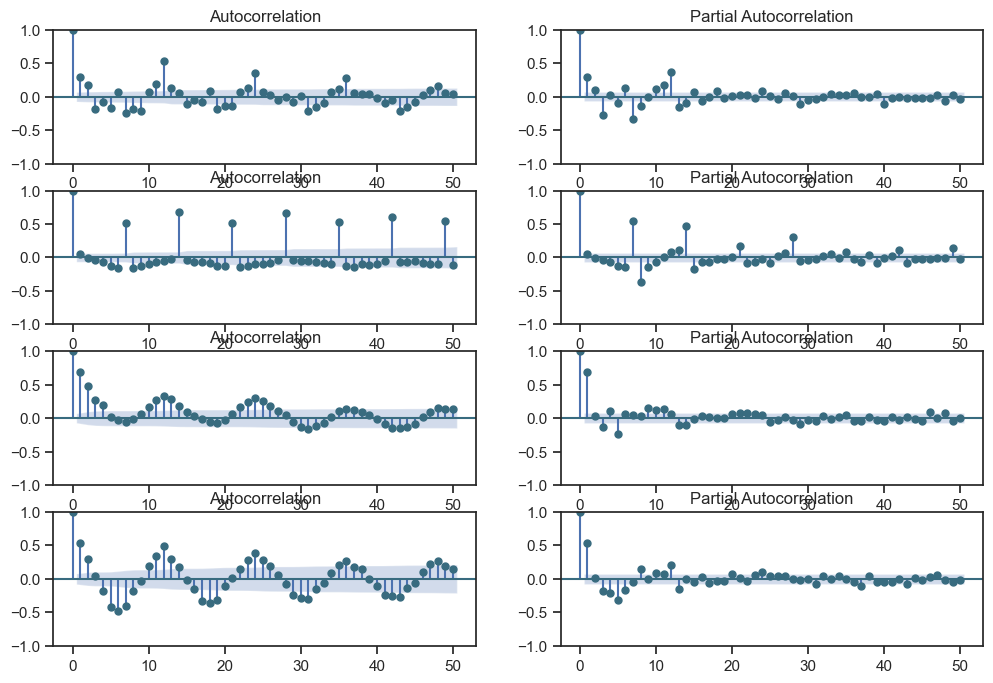

In [204]:
# figure for subplots
plt.figure(figsize = (12, 8))

# acf and pacf for A
plt.subplot(421); plot_acf(sales_a, lags = 50, ax = plt.gca(), color = c)
plt.subplot(422); plot_pacf(sales_a, lags = 50, ax = plt.gca(), color = c)

# acf and pacf for B
plt.subplot(423); plot_acf(sales_b, lags = 50, ax = plt.gca(), color = c)
plt.subplot(424); plot_pacf(sales_b, lags = 50, ax = plt.gca(), color = c)

# acf and pacf for C
plt.subplot(425); plot_acf(sales_c, lags = 50, ax = plt.gca(), color = c)
plt.subplot(426); plot_pacf(sales_c, lags = 50, ax = plt.gca(), color = c)

# acf and pacf for D
plt.subplot(427); plot_acf(sales_d, lags = 50, ax = plt.gca(), color = c)
plt.subplot(428); plot_pacf(sales_d, lags = 50, ax = plt.gca(), color = c)

plt.show()

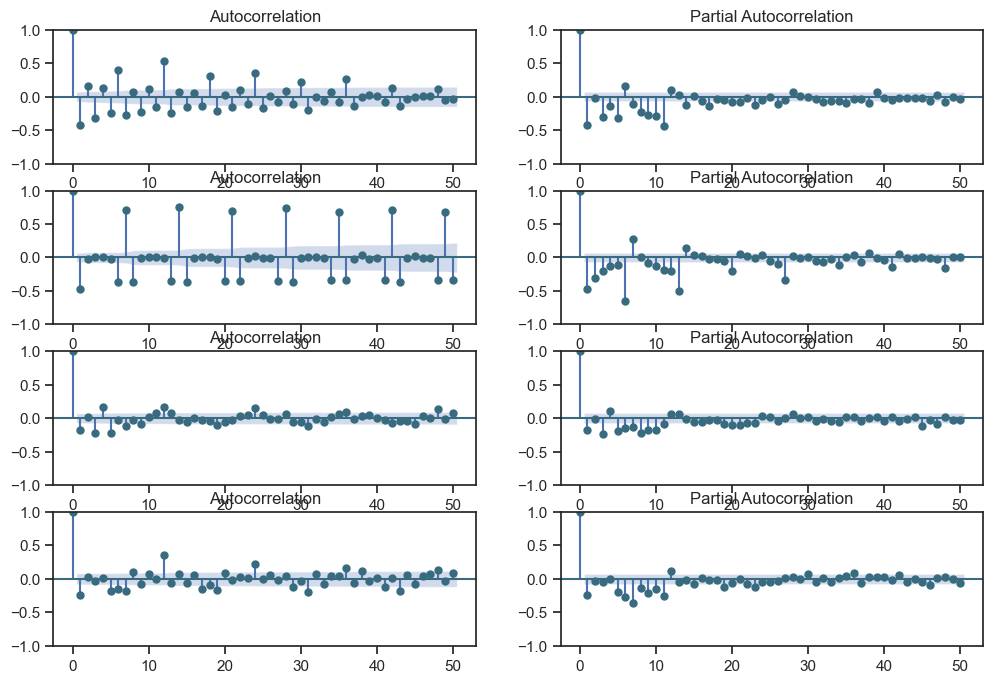

In [205]:
# figure for subplots
plt.figure(figsize = (12, 8))

# acf and pacf for A
plt.subplot(421); plot_acf(first_diff_a, lags = 50, ax = plt.gca(), color = c)
plt.subplot(422); plot_pacf(first_diff_a, lags = 50, ax = plt.gca(), color = c)

# acf and pacf for B
plt.subplot(423); plot_acf(first_diff_b, lags = 50, ax = plt.gca(), color = c)
plt.subplot(424); plot_pacf(first_diff_b, lags = 50, ax = plt.gca(), color = c)

# acf and pacf for C
plt.subplot(425); plot_acf(first_diff_c, lags = 50, ax = plt.gca(), color = c)
plt.subplot(426); plot_pacf(first_diff_c, lags = 50, ax = plt.gca(), color = c)

# acf and pacf for D
plt.subplot(427); plot_acf(first_diff_d, lags = 50, ax = plt.gca(), color = c)
plt.subplot(428); plot_pacf(first_diff_d, lags = 50, ax = plt.gca(), color = c)

plt.show()

In [207]:
from statsmodels.tsa.arima_model import ARIMA

In [223]:
sarima_mod_a = sm.tsa.statespace.SARIMAX(sales_a, trend='n', order=(11,1,0), seasonal_order=(2,1,0,12)).fit()
print(sarima_mod_a.summary())

c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                  784
Model:             SARIMAX(11, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -6650.912
Date:                             Wed, 16 Nov 2022   AIC                          13329.824
Time:                                     13:01:12   BIC                          13394.891
Sample:                                          0   HQIC                         13354.863
                                             - 784                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6446      0.027    -23.711      0.000      -0.698      -0.591
ar.L2         -0.4139      

NormaltestResult(statistic=53.72265246028314, pvalue=2.1591073789252327e-12)


c:\Users\mahen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


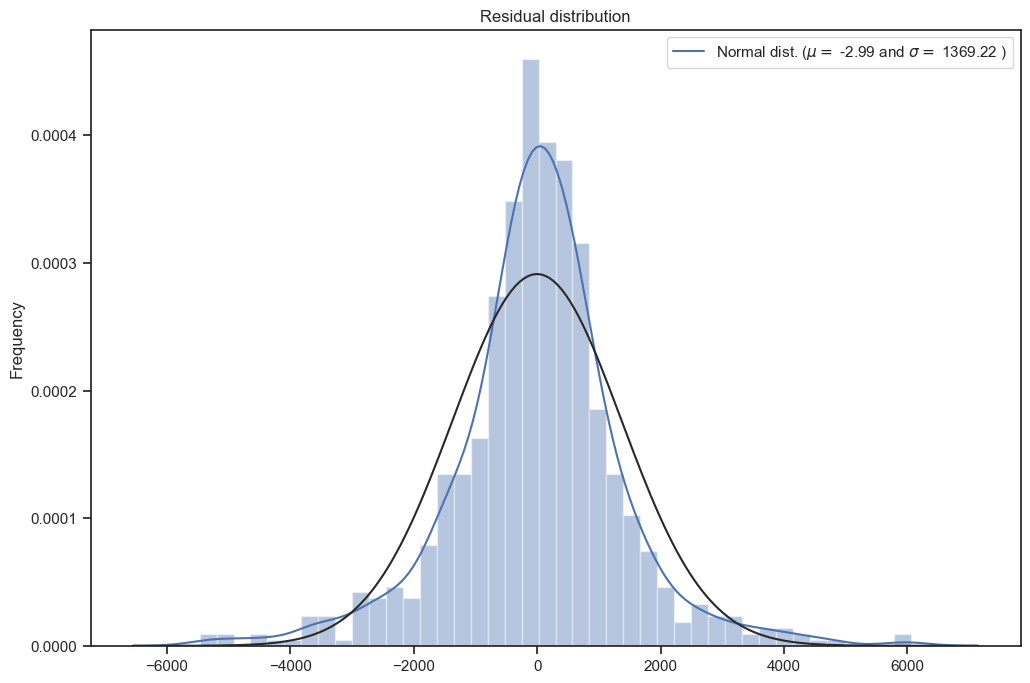

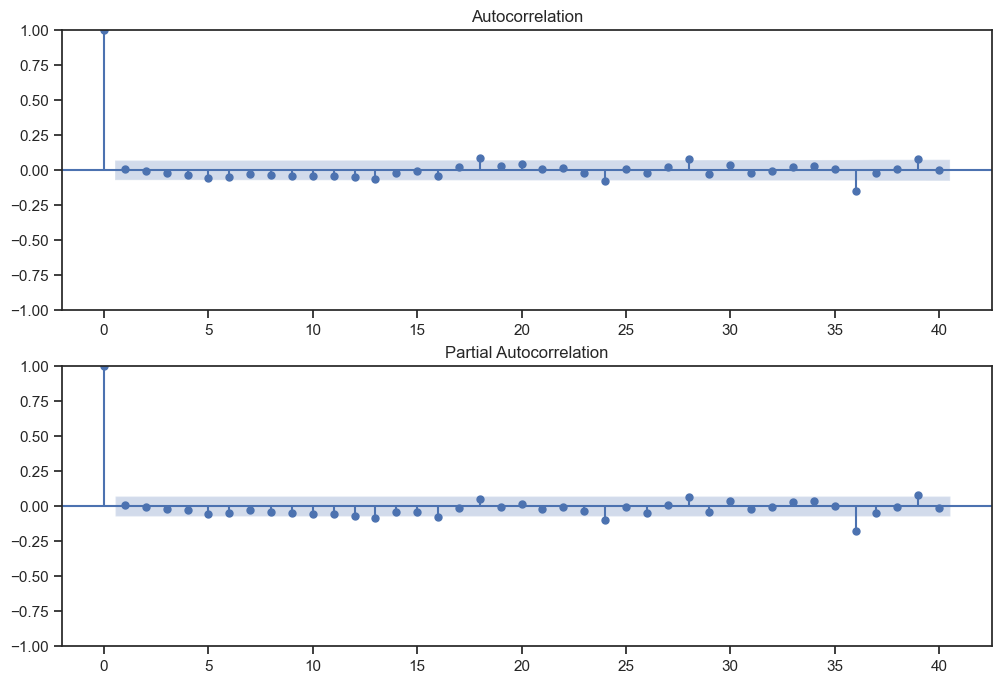

In [224]:
residual_plot(sarima_mod_a)

In [225]:
print(sales_a.shape)
sales_a.head()

(784,)


Date
2015-07-31    6064.0
2015-07-30    5567.0
2015-07-29    6402.0
2015-07-28    5671.0
2015-07-27    6627.0
Name: Sales, dtype: float64

In [231]:
sales_a_reindex = sales_a.reindex(index=sales_a.index[::-1])
sales_a_reindex

Date
2013-01-02    4422.0
2013-01-03    4159.0
2013-01-04    4484.0
2013-01-05    2342.0
2013-01-07    6775.0
               ...  
2015-07-27    6627.0
2015-07-28    5671.0
2015-07-29    6402.0
2015-07-30    5567.0
2015-07-31    6064.0
Name: Sales, Length: 784, dtype: float64

In [232]:
mydata_a = sales_a_reindex

In [233]:
print(mydata_a)

Date
2013-01-02    4422.0
2013-01-03    4159.0
2013-01-04    4484.0
2013-01-05    2342.0
2013-01-07    6775.0
               ...  
2015-07-27    6627.0
2015-07-28    5671.0
2015-07-29    6402.0
2015-07-30    5567.0
2015-07-31    6064.0
Name: Sales, Length: 784, dtype: float64


In [234]:
temp_df =pd.DataFrame(mydata_a)

In [235]:
mydata_a = temp_df

In [236]:
sarima_mod_a_train = sm.tsa.statespace.SARIMAX(mydata_a, trend='n', order=(11,1,0), seasonal_order=(2,1,0,12)).fit()
print(sarima_mod_a_train.summary())

c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                  784
Model:             SARIMAX(11, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -6650.967
Date:                             Wed, 16 Nov 2022   AIC                          13329.933
Time:                                     13:03:53   BIC                          13395.001
Sample:                                          0   HQIC                         13354.973
                                             - 784                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6429      0.029    -22.226      0.000      -0.700      -0.586
ar.L2         -0.4115      

NormaltestResult(statistic=90.08657575127071, pvalue=2.741249899932296e-20)


c:\Users\mahen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


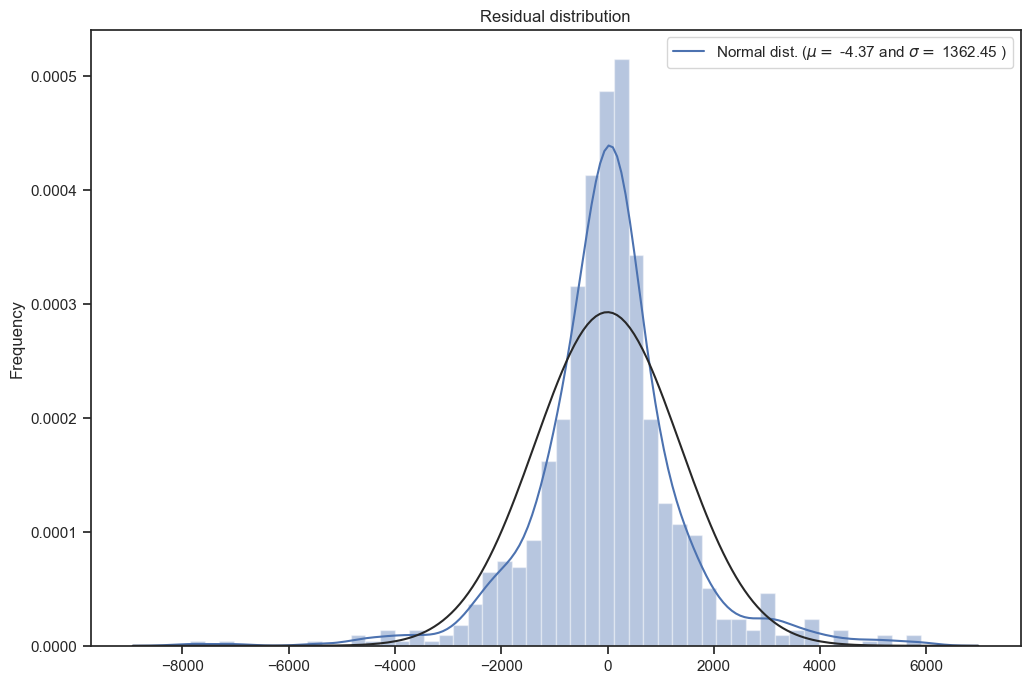

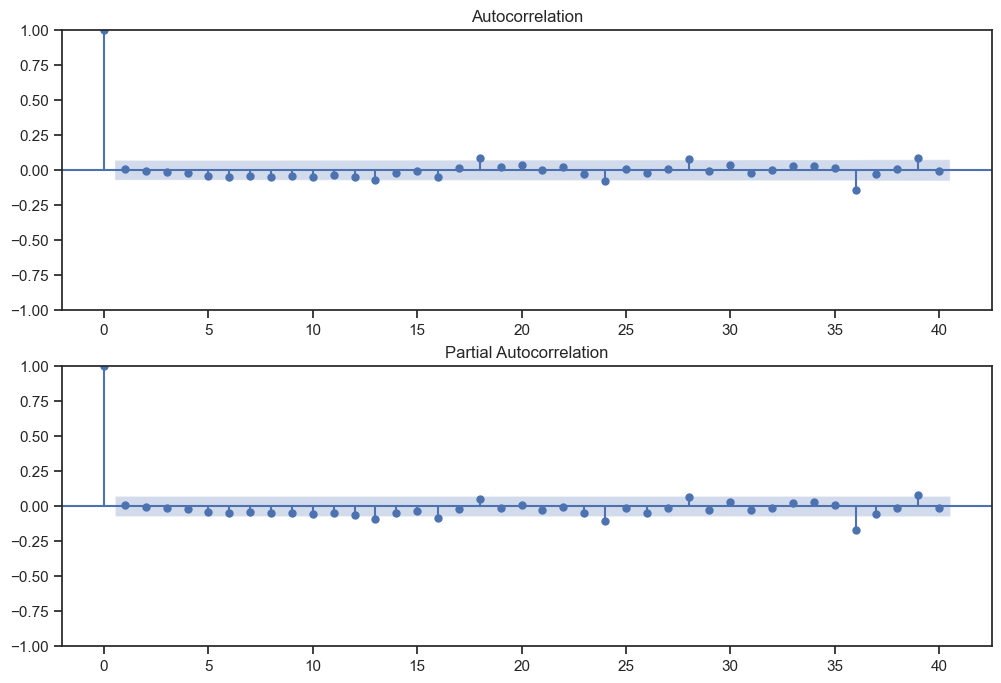

In [237]:
residual_plot(sarima_mod_a_train)

Text(0.5, 0, 'Time')

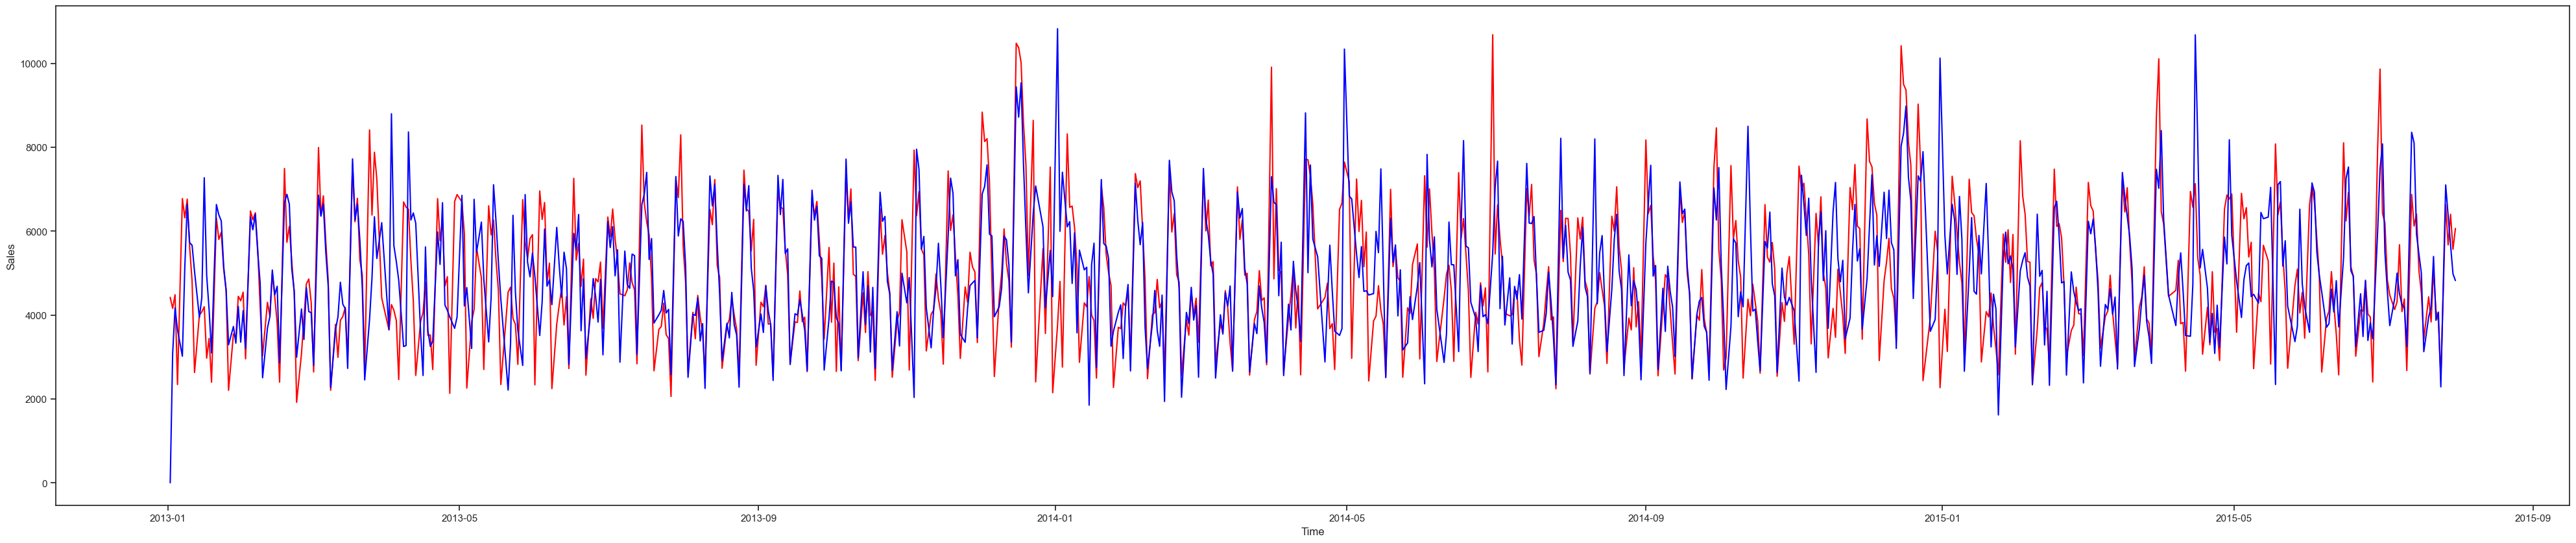

In [238]:
plt.figure(figsize=(50,10))
plt.plot(mydata_a, c='red')
plt.plot(sarima_mod_a_train.fittedvalues, c='blue')
plt.ylabel("Sales")
plt.xlabel("Time")

Date
2015-01-22    4495.673419
2015-01-23    4145.602977
2015-01-24    1617.491690
2015-01-26    5316.759669
2015-01-27    5977.413124
                 ...     
2015-07-27    7101.041815
2015-07-28    6372.795410
2015-07-29    5669.266744
2015-07-30    4981.808443
2015-07-31    4821.878128
Name: predicted_mean, Length: 159, dtype: float64

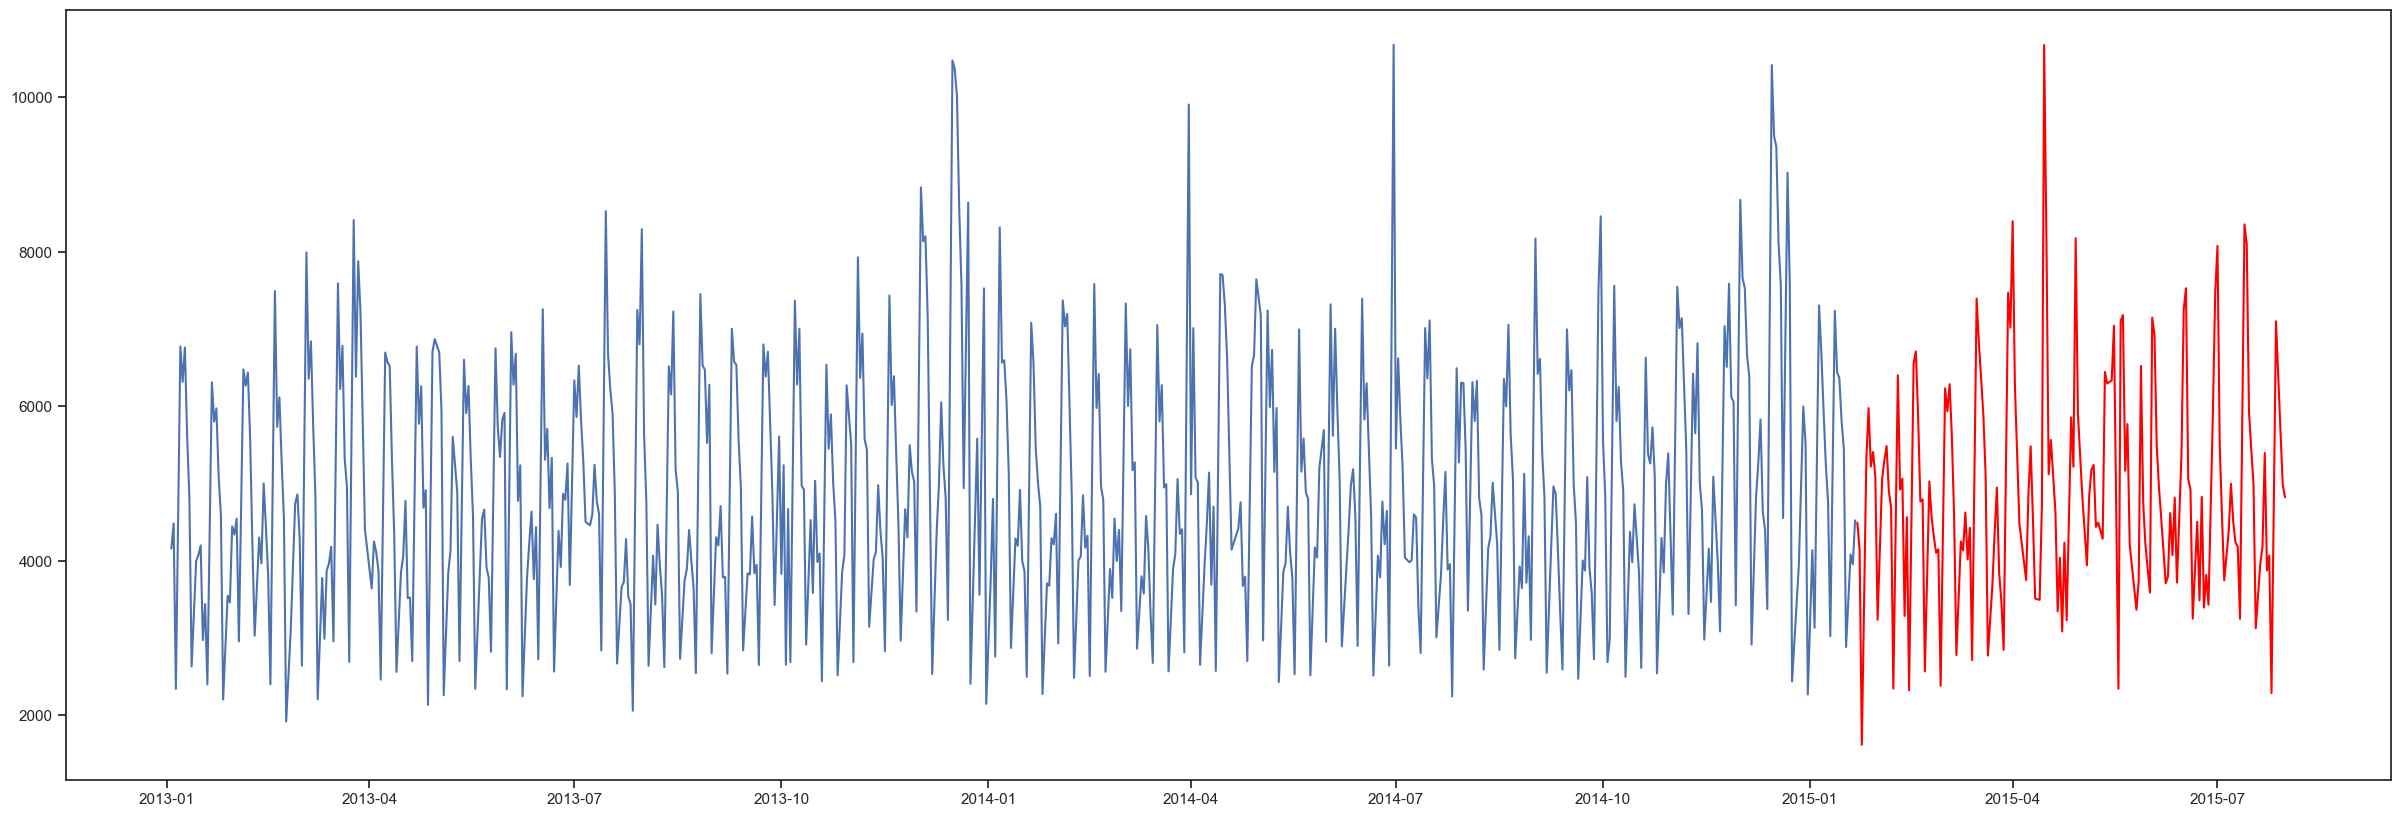

In [239]:
plt.figure(figsize=(30,10))
forecast = sarima_mod_a_train.predict(start = 625, end = 783, dynamic= False)  
plt.plot(mydata_a.iloc[1:625])
plt.plot(forecast, c = "red")
forecast

In [240]:
sarima_mod_b = sm.tsa.statespace.SARIMAX(sales_b, trend='n', order=(11,1,0), seasonal_order=(2,1,0,12)).fit()
print(sarima_mod_b.summary())

c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization 

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                  942
Model:             SARIMAX(11, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -8444.255
Date:                             Wed, 16 Nov 2022   AIC                          16916.510
Time:                                     13:05:44   BIC                          16984.187
Sample:                                          0   HQIC                         16942.324
                                             - 942                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5801      0.048    -12.188      0.000      -0.673      -0.487
ar.L2         -0.4547      

NormaltestResult(statistic=38.46622162454915, pvalue=4.437783431600743e-09)


c:\Users\mahen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


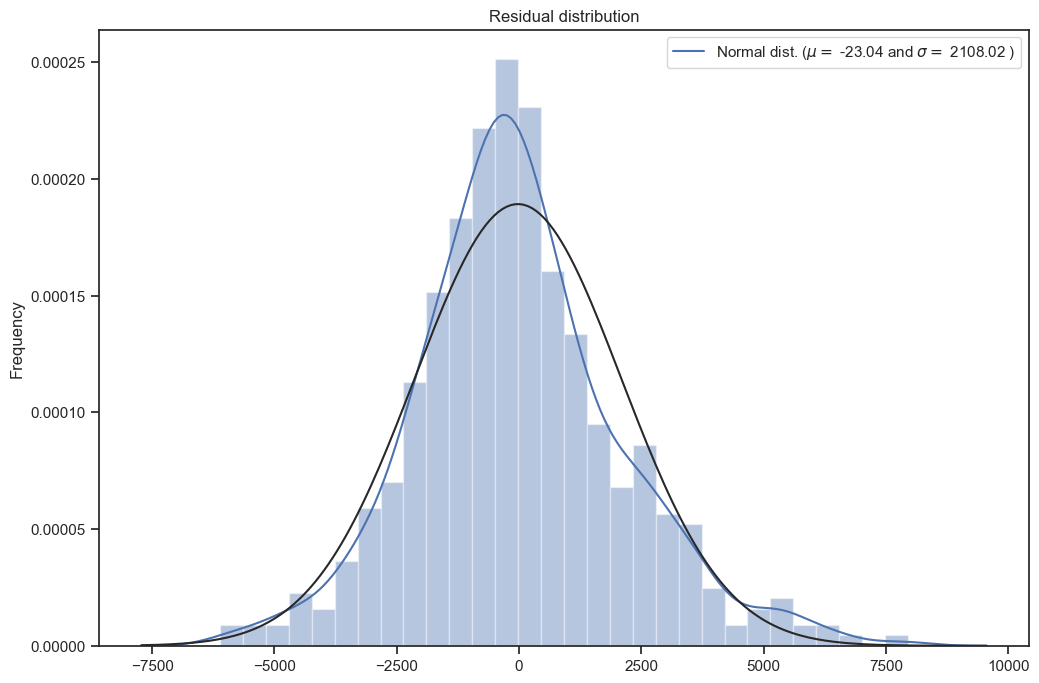

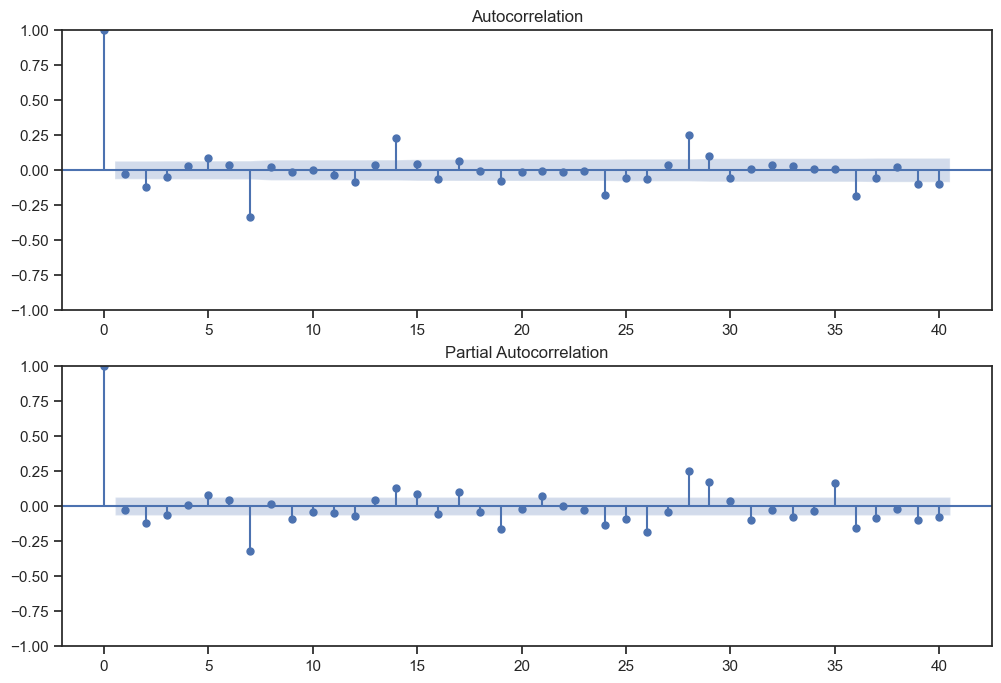

In [241]:
residual_plot(sarima_mod_b)

In [242]:
print(sales_b.shape)
sales_b.head()

(942,)


Date
2015-07-31    7791.0
2015-07-30    7187.0
2015-07-29    7719.0
2015-07-28    7533.0
2015-07-27    7788.0
Name: Sales, dtype: float64

In [243]:
sales_b_reindex = sales_b.reindex(index=sales_b.index[::-1])
mydata_b = sales_b_reindex
temp_df =pd.DataFrame(mydata_b)
mydata_b = temp_df

In [244]:
sarima_mod_b_train = sm.tsa.statespace.SARIMAX(mydata_b, trend='n', order=(11,1,0), seasonal_order=(2,1,0,12)).fit()
print(sarima_mod_b_train.summary())

c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                  942
Model:             SARIMAX(11, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -8444.259
Date:                             Wed, 16 Nov 2022   AIC                          16916.517
Time:                                     13:07:11   BIC                          16984.195
Sample:                                 01-01-2013   HQIC                         16942.331
                                      - 07-31-2015                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5752      0.044    -13.215      0.000      -0.661      -0.490
ar.L2         -0.4420      

NormaltestResult(statistic=41.15029756781162, pvalue=1.1596486288169038e-09)


c:\Users\mahen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


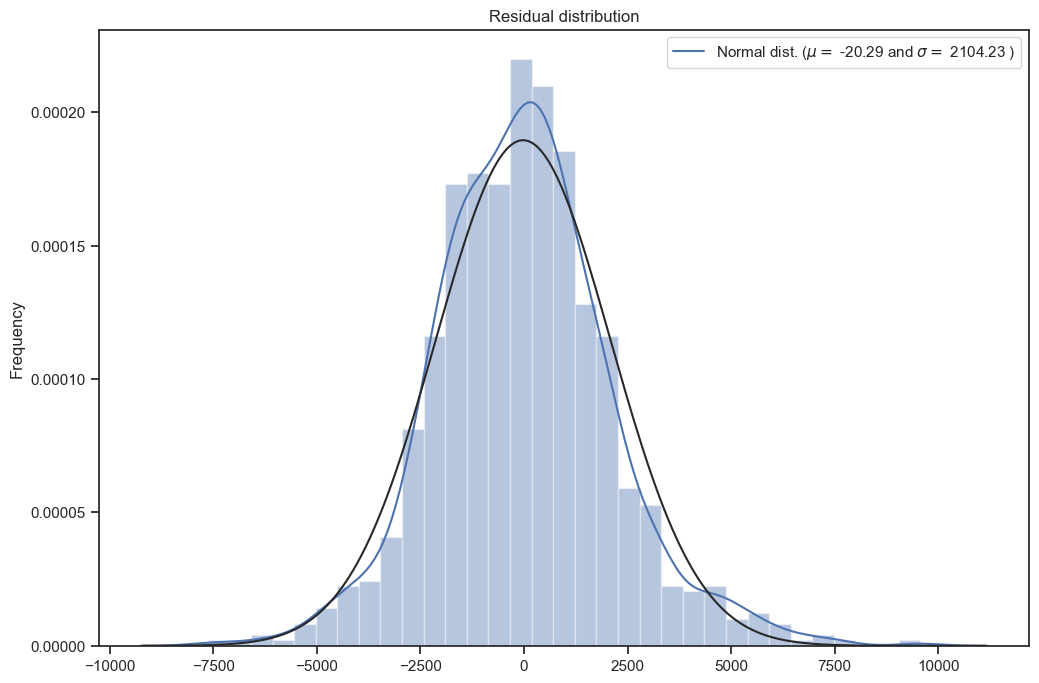

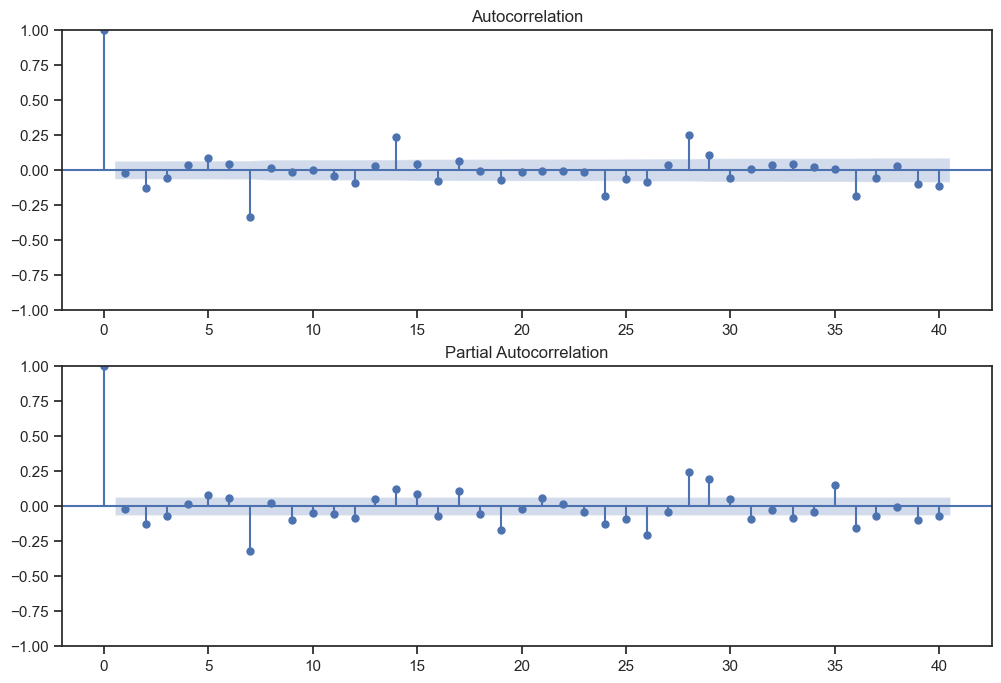

In [245]:
residual_plot(sarima_mod_b_train)

Text(0.5, 0, 'Time')

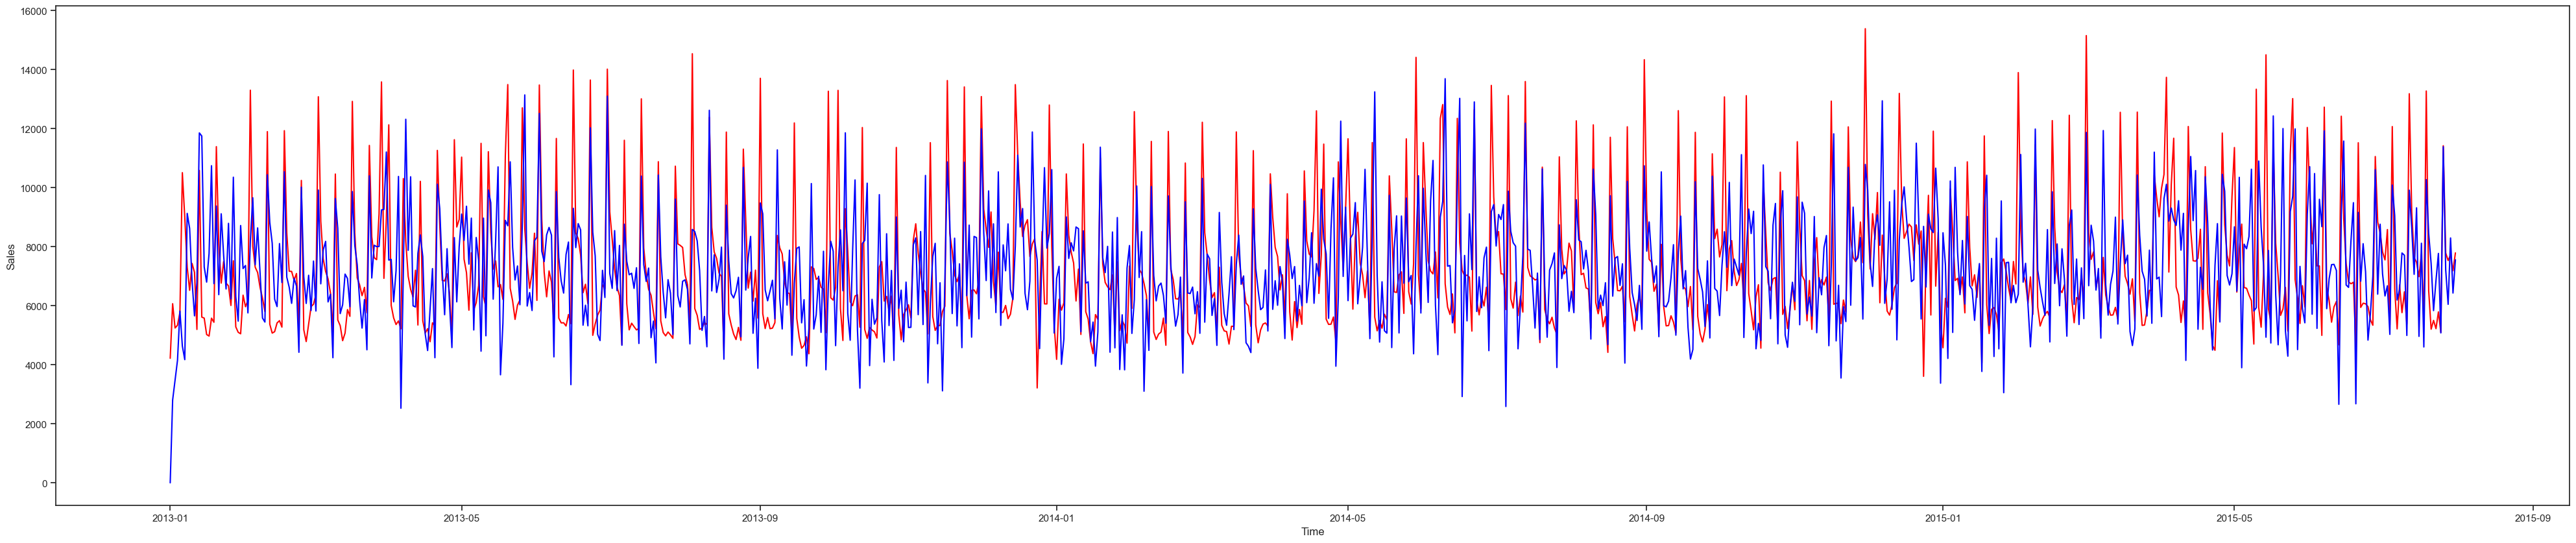

In [246]:
plt.figure(figsize=(50,10))
plt.plot(mydata_b, c='red')
plt.plot(sarima_mod_b_train.fittedvalues, c='blue')
plt.ylabel("Sales")
plt.xlabel("Time")

2015-01-26    3053.619323
2015-01-27    7456.653865
2015-01-28    7472.135749
2015-01-29    6100.534192
2015-01-30    6684.807610
                 ...     
2015-07-27    7217.139451
2015-07-28    6047.795461
2015-07-29    8296.159858
2015-07-30    6430.030470
2015-07-31    7558.704378
Freq: D, Name: predicted_mean, Length: 187, dtype: float64

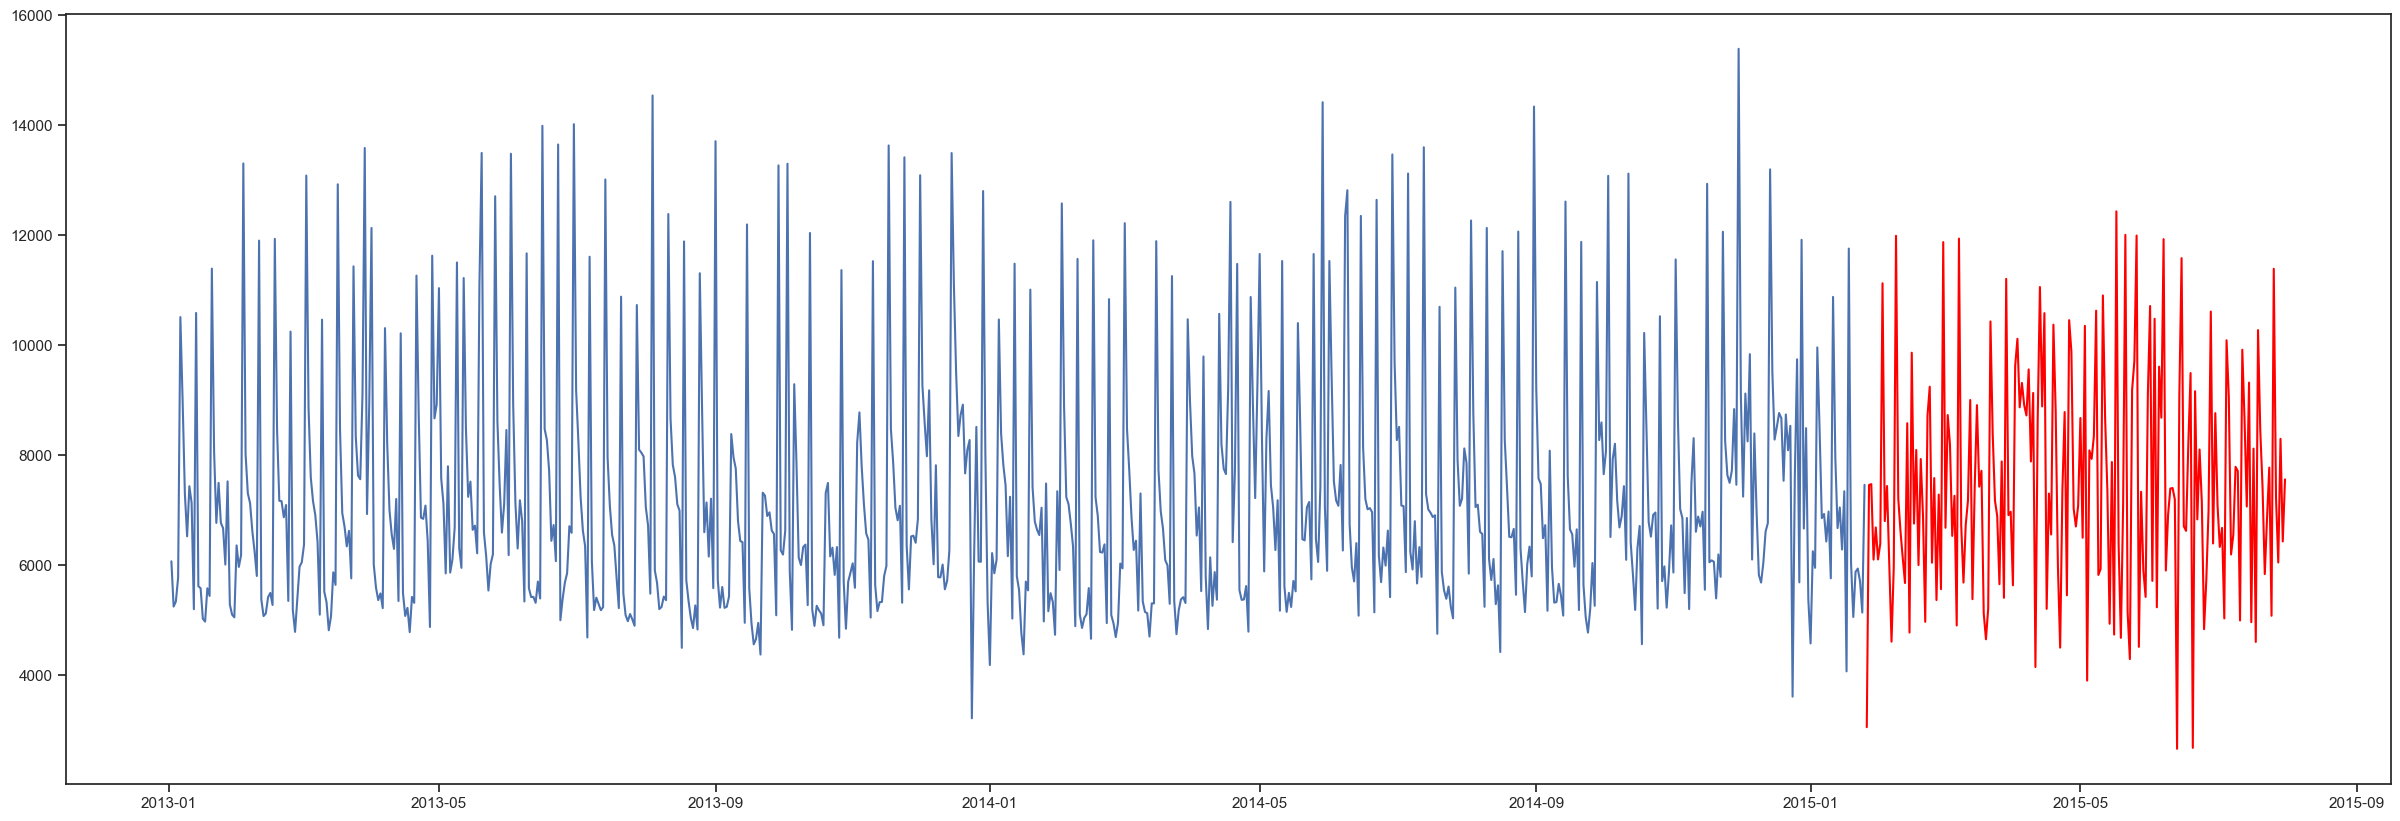

In [247]:
plt.figure(figsize=(30,10))
forecast = sarima_mod_b_train.predict(start = 755, end = 941, dynamic= False)  
plt.plot(mydata_b.iloc[1:755])
plt.plot(forecast, c = "red")
forecast

In [248]:
sarima_mod_c = sm.tsa.statespace.SARIMAX(sales_c, trend='n', order=(11,1,0)).fit()
print(sarima_mod_c.summary())

c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  781
Model:              SARIMAX(11, 1, 0)   Log Likelihood               -6211.688
Date:                Wed, 16 Nov 2022   AIC                          12447.376
Time:                        13:08:05   BIC                          12503.287
Sample:                             0   HQIC                         12468.880
                                - 781                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3038      0.028    -10.802      0.000      -0.359      -0.249
ar.L2         -0.2446      0.043     -5.744      0.000      -0.328      -0.161
ar.L3         -0.3865      0.036    -10.709      0.0

NormaltestResult(statistic=251.2407465342108, pvalue=2.7782100337262047e-55)


c:\Users\mahen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


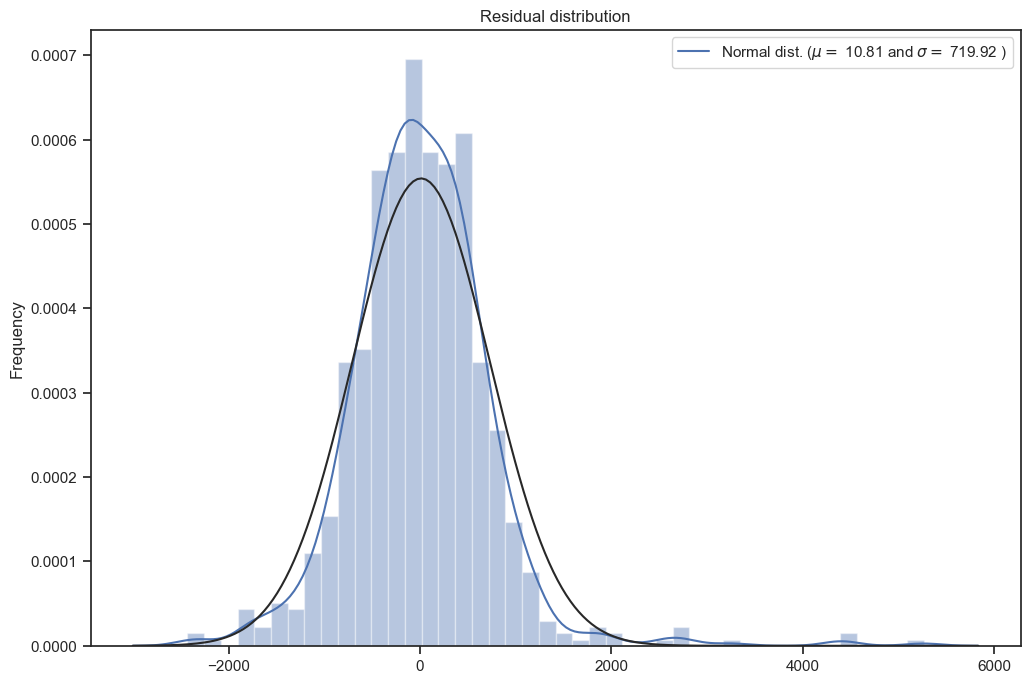

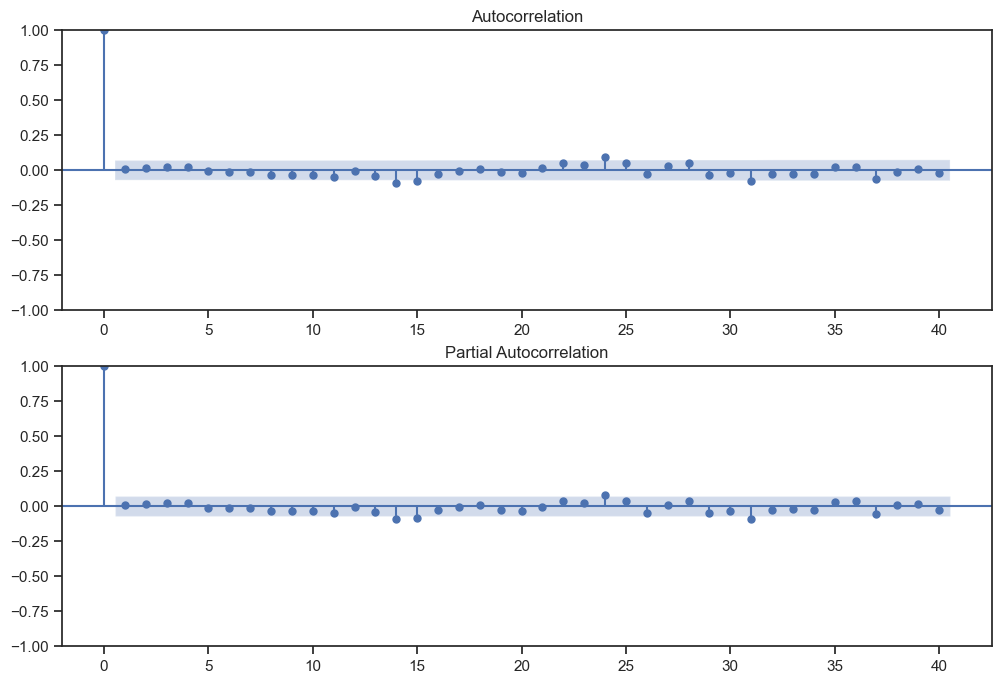

In [249]:
residual_plot(sarima_mod_c)

In [250]:
sales_c_reindex = sales_c.reindex(index=sales_c.index[::-1])
mydata_c = sales_c_reindex
temp_df =pd.DataFrame(mydata_c)
mydata_c = temp_df
sarima_mod_c_train = sm.tsa.statespace.SARIMAX(mydata_c, trend='n', order=(11,1,0), seasonal_order=(2,1,0,12)).fit()
print(sarima_mod_c_train.summary())

c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                  781
Model:             SARIMAX(11, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -6195.593
Date:                             Wed, 16 Nov 2022   AIC                          12419.186
Time:                                     13:08:46   BIC                          12484.199
Sample:                                          0   HQIC                         12444.209
                                             - 781                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3189      0.028    -11.560      0.000      -0.373      -0.265
ar.L2         -0.2187      

NormaltestResult(statistic=109.54336790261263, pvalue=1.6329011518883226e-24)


c:\Users\mahen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


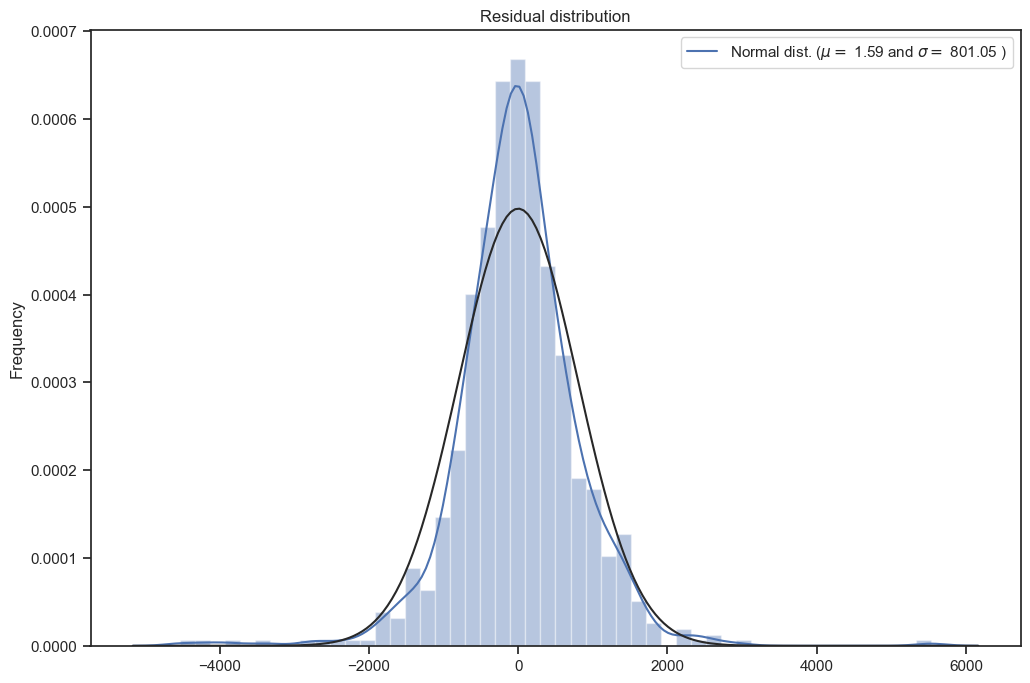

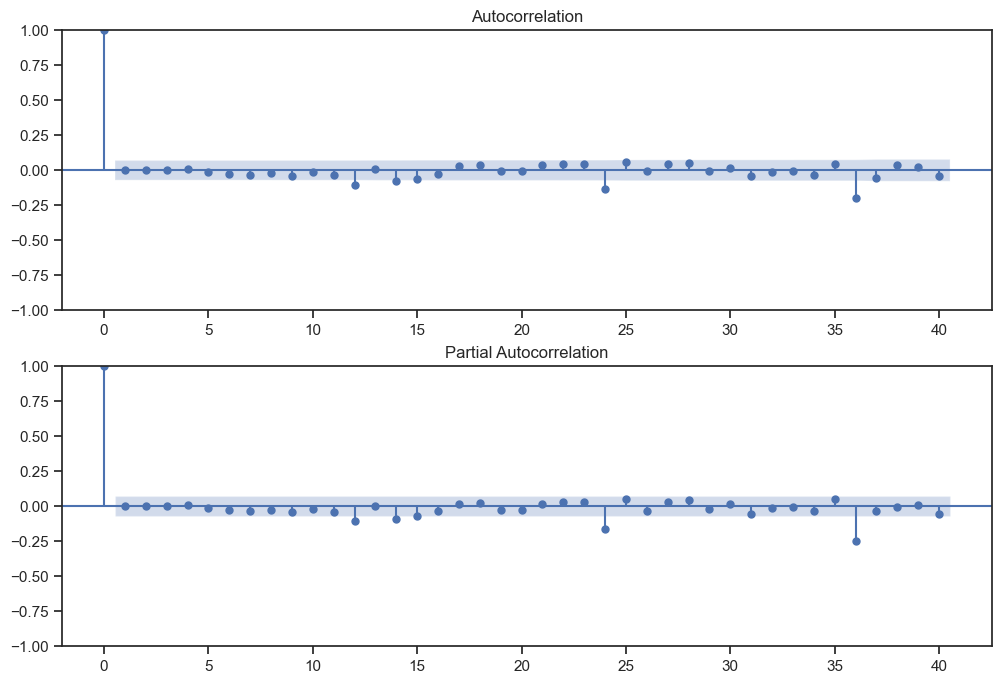

In [251]:
residual_plot(sarima_mod_c_train)


In [252]:
print(sales_c.shape)
sales_c.head()

(781,)


Date
2015-07-31    5263.0
2015-07-30    5020.0
2015-07-29    4782.0
2015-07-28    5011.0
2015-07-27    6102.0
Name: Sales, dtype: float64

Text(0.5, 0, 'Time')

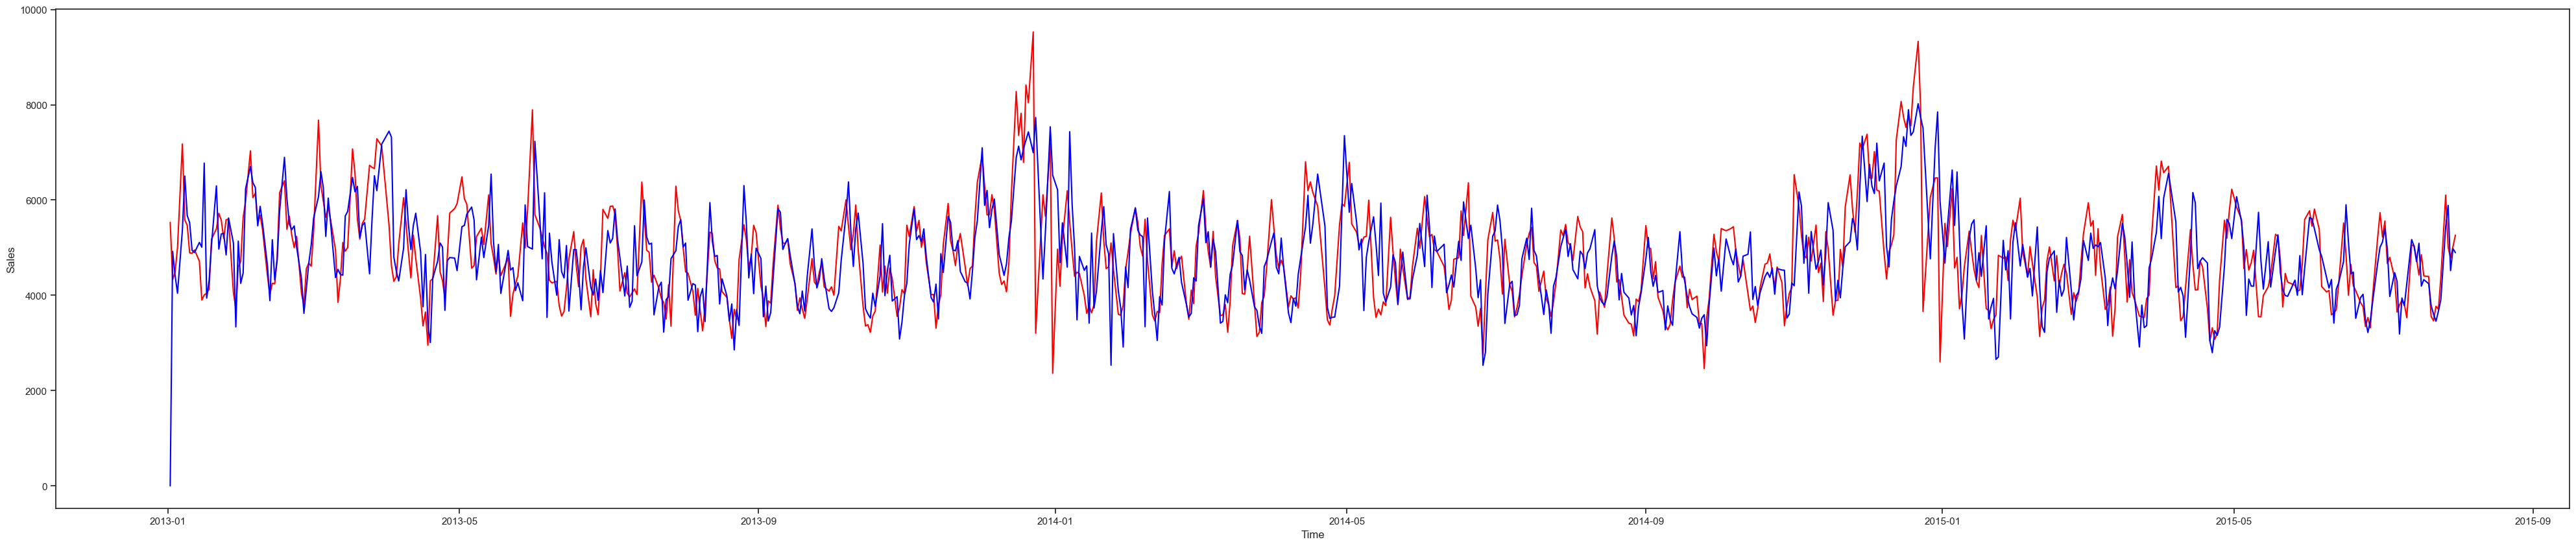

In [253]:
plt.figure(figsize=(50,10))
plt.plot(mydata_c, c='red')
plt.plot(sarima_mod_c_train.fittedvalues, c='blue')
plt.ylabel("Sales")
plt.xlabel("Time")

Date
2015-01-24    2704.998501
2015-01-26    5153.097274
2015-01-27    4533.235972
2015-01-28    4936.088026
2015-01-29    3503.130984
                 ...     
2015-07-27    5442.112303
2015-07-28    5887.323798
2015-07-29    4517.758633
2015-07-30    4978.482653
2015-07-31    4895.070079
Name: predicted_mean, Length: 156, dtype: float64

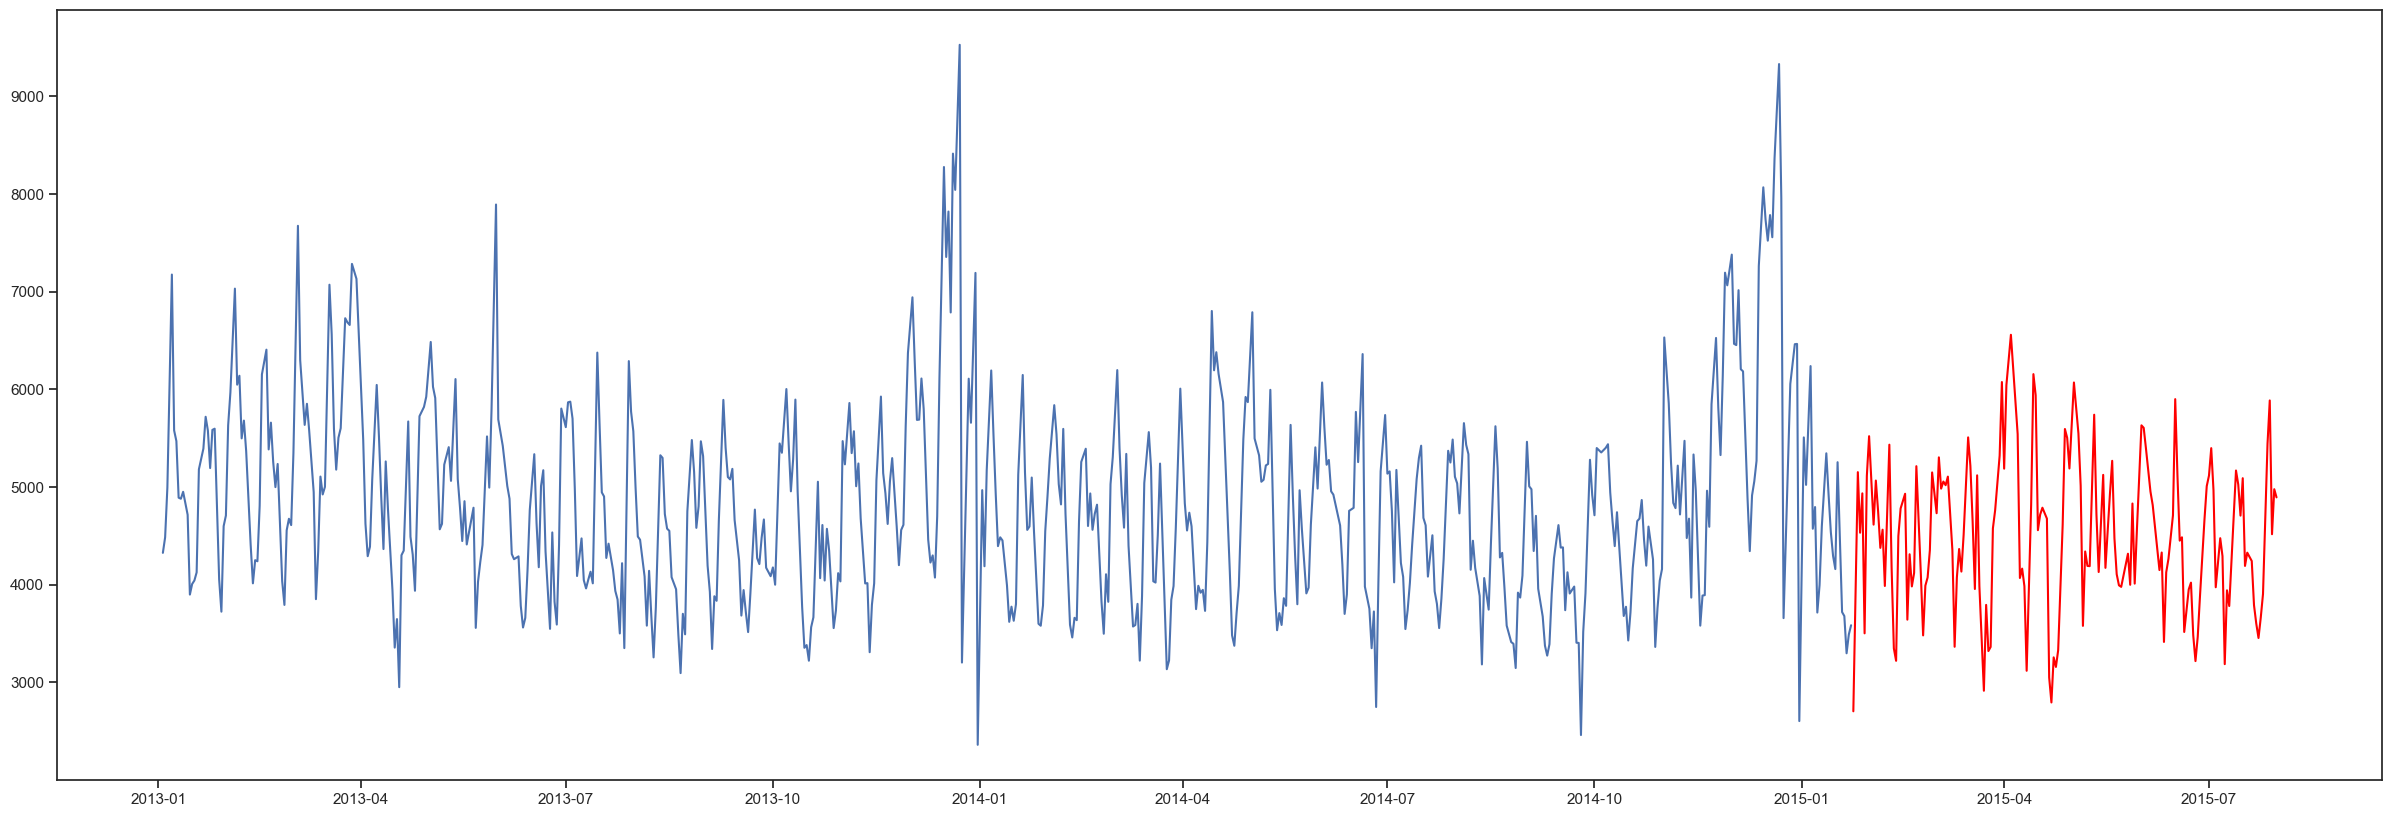

In [254]:
plt.figure(figsize=(30,10))
forecast = sarima_mod_c_train.predict(start = 625, end = 780, dynamic= False)  
plt.plot(mydata_c.iloc[1:625])
plt.plot(forecast, c = "red")
forecast

In [255]:
sarima_mod_d = sm.tsa.statespace.SARIMAX(sales_d, trend='n', order=(11,1,0),seasonal_order=(2,1,0,12)).fit()
print(sarima_mod_d.summary())

c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                  621
Model:             SARIMAX(11, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -5241.005
Date:                             Wed, 16 Nov 2022   AIC                          10510.009
Time:                                     13:10:31   BIC                          10571.752
Sample:                                          0   HQIC                         10534.030
                                             - 621                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5266      0.034    -15.644      0.000      -0.593      -0.461
ar.L2         -0.4017      

NormaltestResult(statistic=72.61065183460241, pvalue=1.7092173413163233e-16)


c:\Users\mahen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


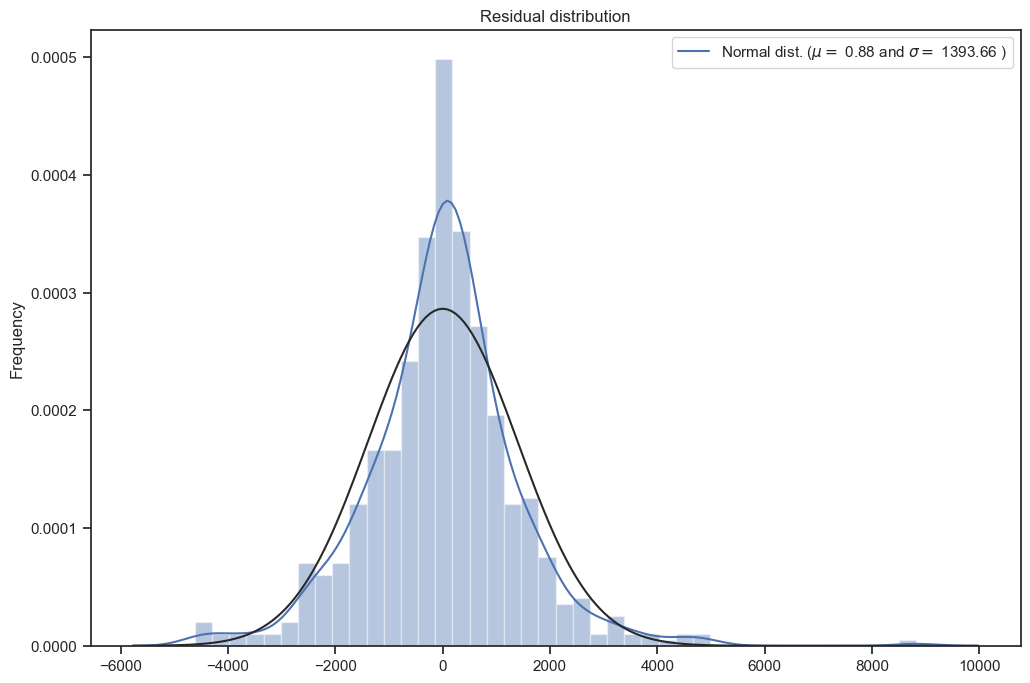

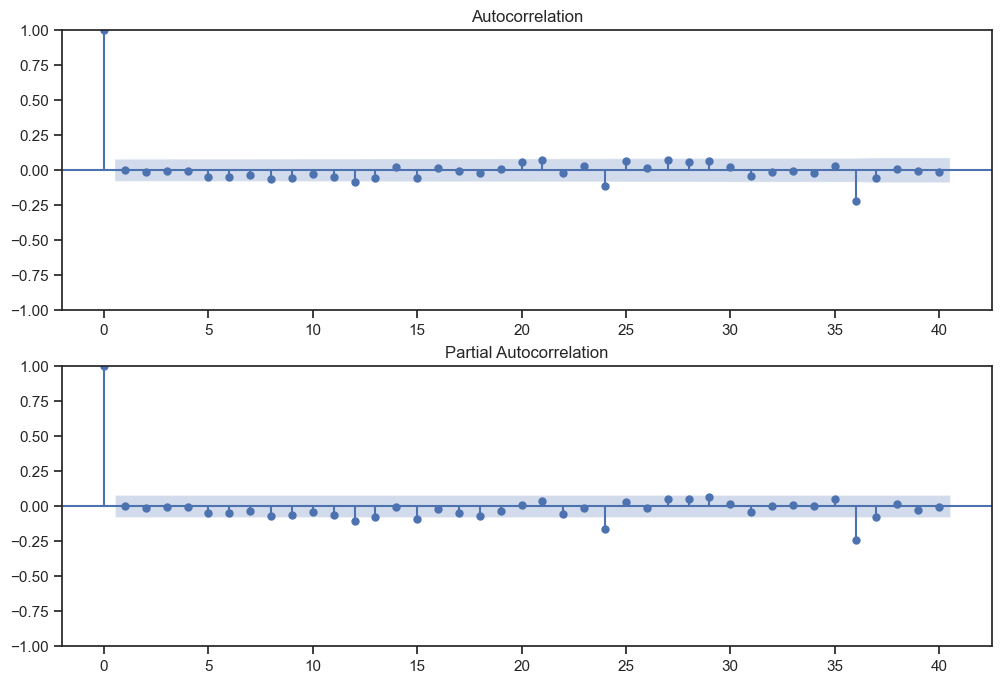

In [256]:
residual_plot(sarima_mod_d)

In [257]:
print(sales_d.shape)
sales_d.head()

(621,)


Date
2015-07-31    8821.0
2015-07-30    7648.0
2015-07-29    6648.0
2015-07-28    6819.0
2015-07-27    7926.0
Name: Sales, dtype: float64

In [260]:
sales_d_reindex = sales_d.reindex(index=sales_d.index[::-1])
mydata_d = sales_d_reindex
temp_df =pd.DataFrame(mydata_d)
mydata_d = temp_df

In [261]:
sarima_mod_d_train = sm.tsa.statespace.SARIMAX(mydata_d, trend='n', order=(11,1,0),seasonal_order=(2,1,0,12)).fit()
print(sarima_mod_d_train.summary())

c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                  621
Model:             SARIMAX(11, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -5241.636
Date:                             Wed, 16 Nov 2022   AIC                          10511.273
Time:                                     13:11:32   BIC                          10573.015
Sample:                                          0   HQIC                         10535.294
                                             - 621                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5225      0.033    -16.067      0.000      -0.586      -0.459
ar.L2         -0.3988      

NormaltestResult(statistic=33.39108479744962, pvalue=5.613297548904786e-08)


c:\Users\mahen\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\mahen\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


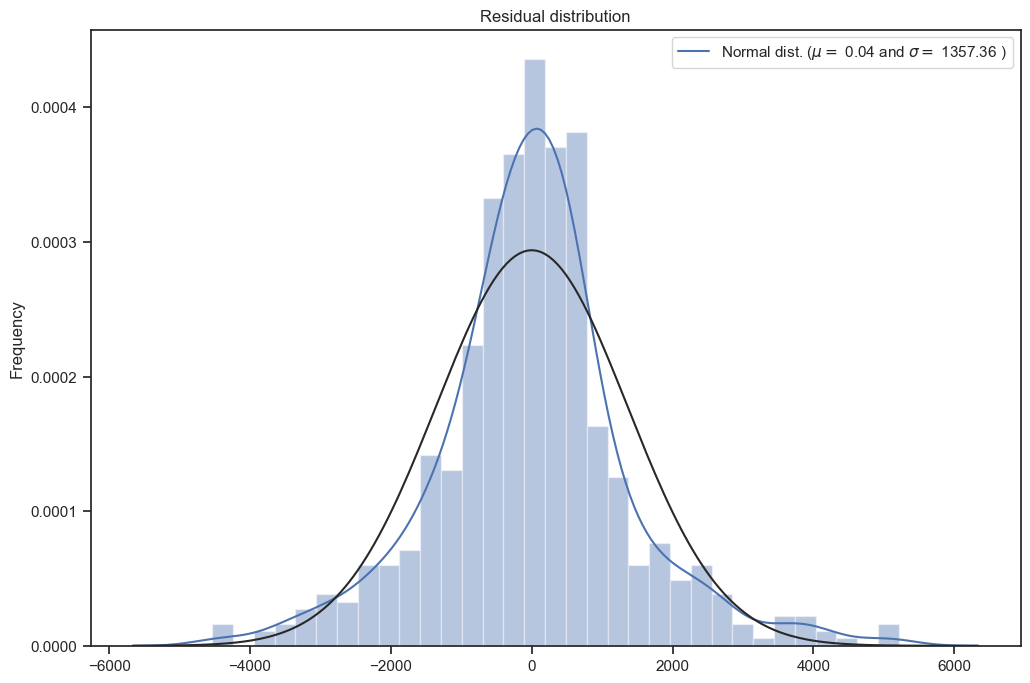

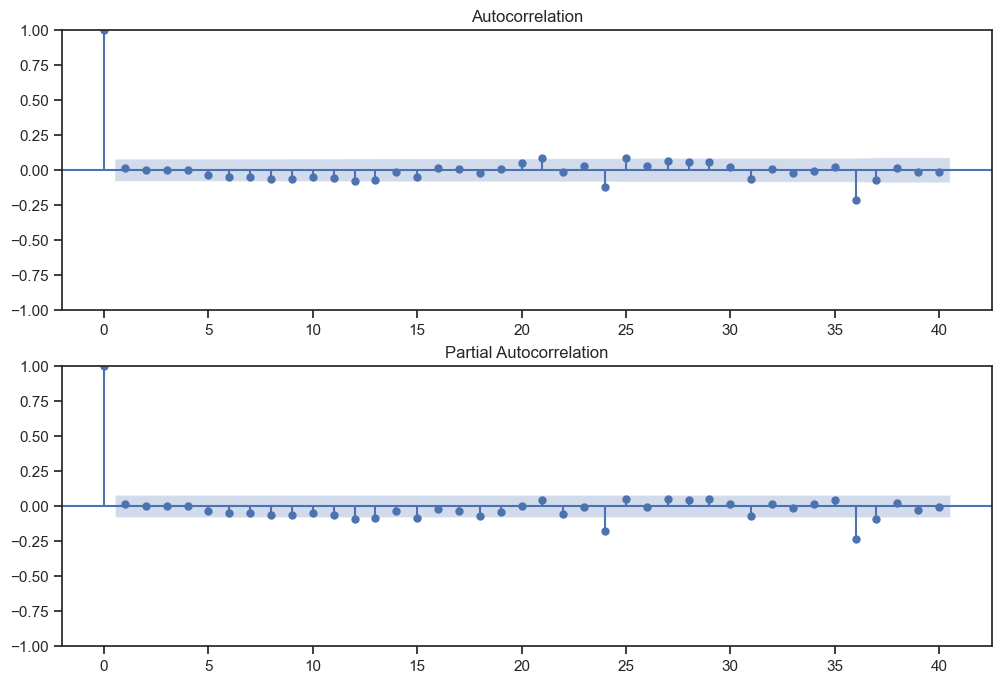

In [262]:
residual_plot(sarima_mod_d_train)

Text(0.5, 0, 'Time')

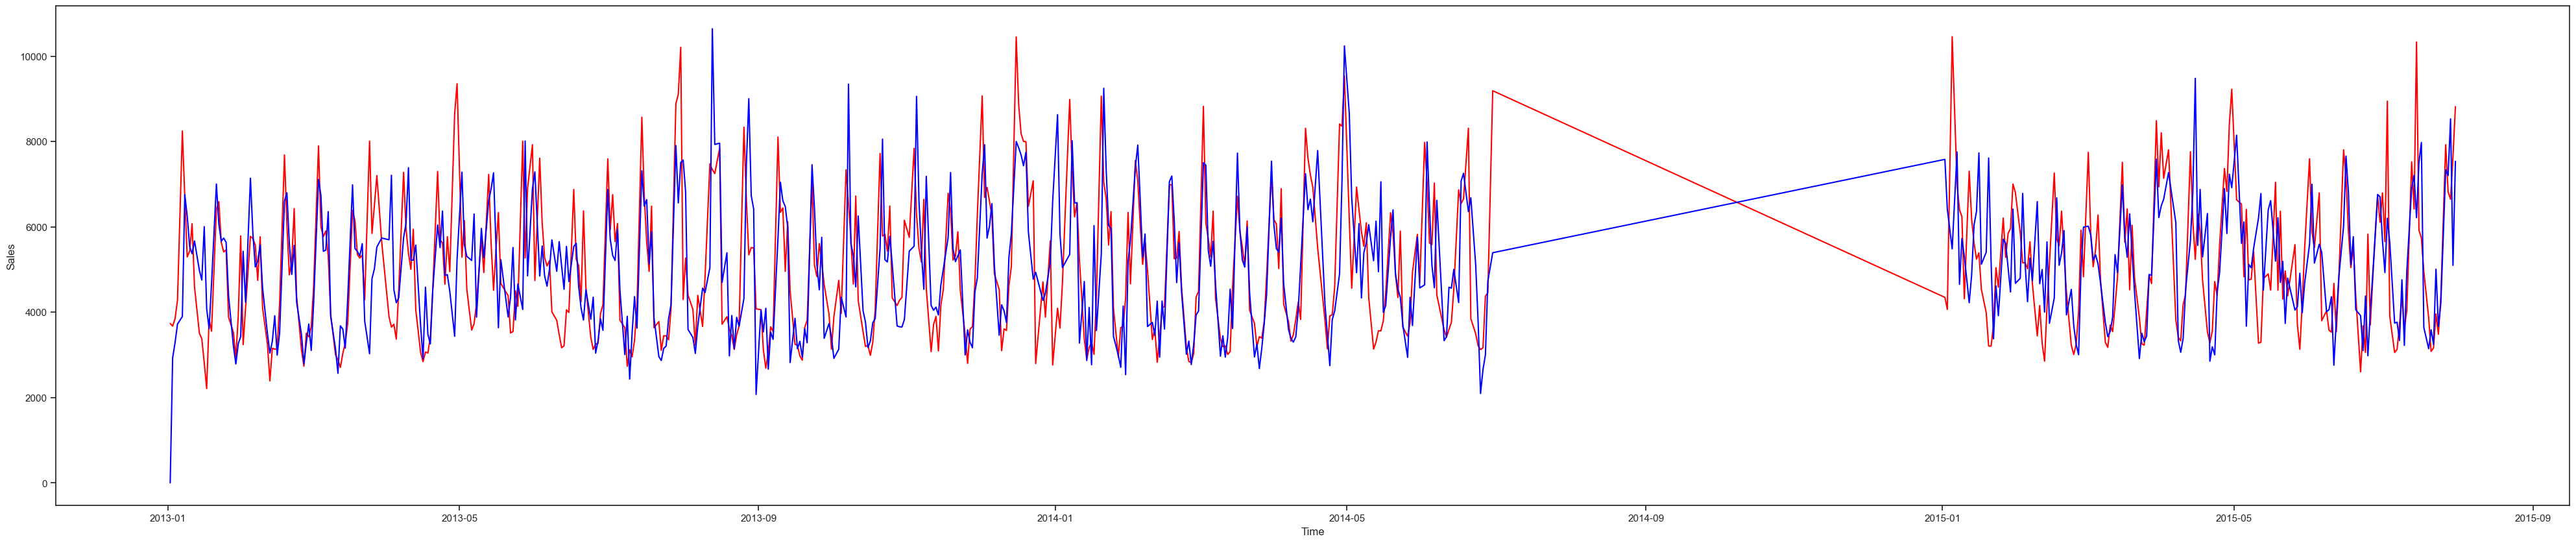

In [263]:
plt.figure(figsize=(50,10))
plt.plot(mydata_d, c='red')
plt.plot(sarima_mod_d_train.fittedvalues, c='blue')
plt.ylabel("Sales")
plt.xlabel("Time")

Date
2015-02-28    5994.136949
2015-03-02    6017.355404
2015-03-03    5805.801569
2015-03-04    5224.132826
2015-03-05    5346.121789
                 ...     
2015-07-27    7340.971884
2015-07-28    7203.870112
2015-07-29    8531.910520
2015-07-30    5098.655544
2015-07-31    7538.063458
Name: predicted_mean, Length: 126, dtype: float64

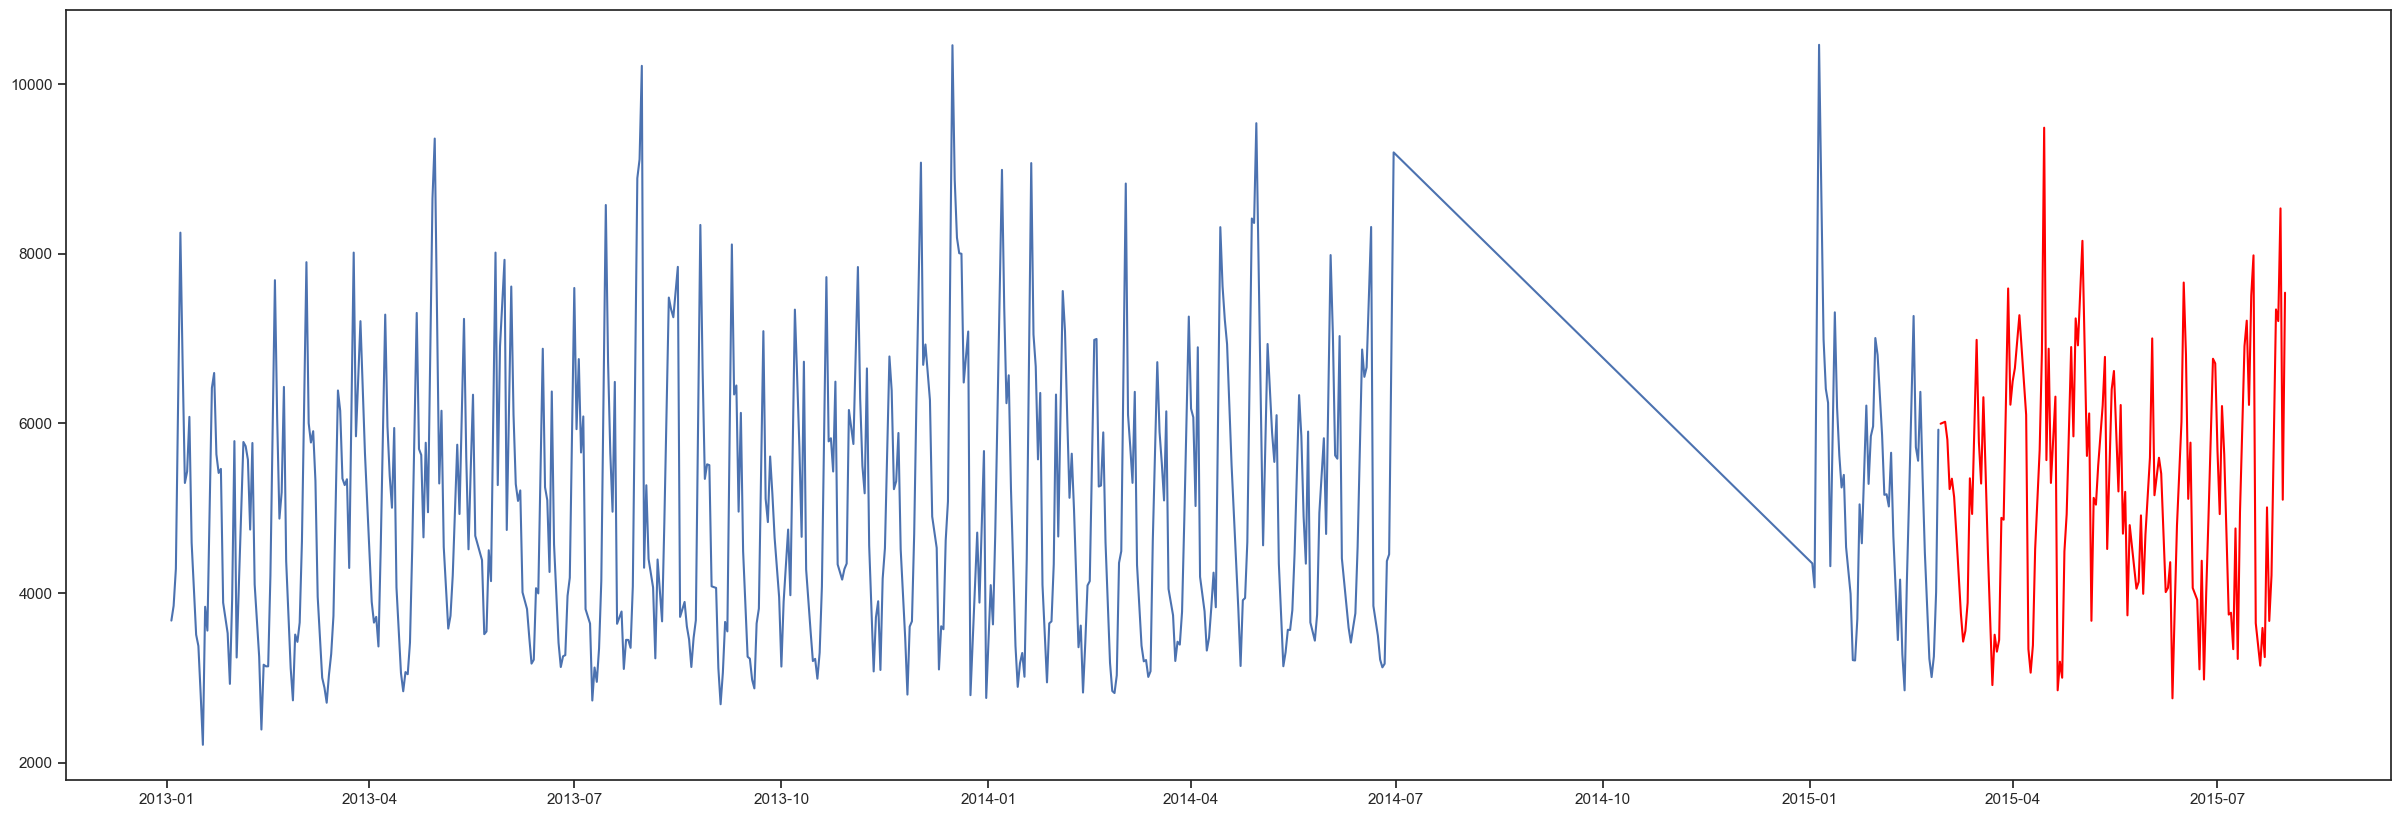

In [264]:
plt.figure(figsize=(30,10))
forecast = sarima_mod_d_train.predict(start = 495, end = 620, dynamic= False)  
plt.plot(mydata_d.iloc[1:495])
plt.plot(forecast, c = "red")
forecast